# <center> M5 T01: Algoritmes d'aprenentatge Supervisat: Classificació

## Limpieza (y algo de "Ingeniería")
Vuelvo a realizar la mayor parte de los pasos de los anteriores ejercicios, pero con cambios, (y añado algun paso más).

In [1]:
# Importo algunas de las librerías que voy a utilizar:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sbrn

Importo el archivo CSV y elimino la columna '**Unnamed: 0**':

In [19]:
# Almaceno en un dataframe el csv:
flights = pandas.read_csv('./input/DelayedFlights.csv')

# Elimino la columna 'Unnamed: 0', correspondiente a los índices originales:
del(flights['Unnamed: 0'])

flights

Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  ArrTime  \
0        2008      1           3          4   2003.0        1955   2211.0   
1        2008      1           3          4    754.0         735   1002.0   
2        2008      1           3          4    628.0         620    804.0   
3        2008      1           3          4   1829.0        1755   1959.0   
4        2008      1           3          4   1940.0        1915   2121.0   
...       ...    ...         ...        ...      ...         ...      ...   
1936753  2008     12          13          6   1250.0        1220   1617.0   
1936754  2008     12          13          6    657.0         600    904.0   
1936755  2008     12          13          6   1007.0         847   1149.0   
1936756  2008     12          13          6   1251.0        1240   1446.0   
1936757  2008     12          13          6   1110.0        1103   1413.0   

         CRSArrTime UniqueCarrier  FlightNum  ... TaxiIn  TaxiOut  Cancelled  \
0              2225            WN        335  ...    4.0      8.0          0   
1              1000            WN       3231  ...    5.0     10.0          0   
2               750            WN        448  ...    3.0     17.0          0   
3              1925            WN       3920  ...    3.0     10.0          0   
4              2110            WN        378  ...    4.0     10.0          0   
...             ...           ...        ...  ...    ...      ...        ...   
1936753        1552            DL       1621  ...    9.0     18.0          0   
1936754         749            DL       1631  ...   15.0     34.0          0   
1936755        1010            DL       1631  ...    8.0     32.0          0   
1936756        1437            DL       1639  ...   13.0     13.0          0   
1936757        1418            DL       1641  ...    8.0     11.0          0   

         CancellationCode  Diverted  CarrierDelay WeatherDelay NASDelay  \
0                       N         0           NaN          NaN      NaN   
1                       N         0           NaN          NaN      NaN   
2                       N         0           NaN          NaN      NaN   
3                       N         0           2.0          0.0      0.0   
4                       N         0           NaN          NaN      NaN   
...                   ...       ...           ...          ...      ...   
1936753                 N         0           3.0          0.0      0.0   
1936754                 N         0           0.0         57.0     18.0   
1936755                 N         0           1.0          0.0     19.0   
1936756                 N         0           NaN          NaN      NaN   
1936757                 N         0           NaN          NaN      NaN   

         SecurityDelay  LateAircraftDelay  
0                  NaN                NaN  
1                  NaN                NaN  
2                  NaN                NaN  
3                  0.0               32.0  
4                  NaN                NaN  
...                ...                ...  
1936753            0.0               22.0  
1936754            0.0                0.0  
1936755            0.0               79.0  
1936756            NaN                NaN  
1936757            NaN                NaN  

[1936758 rows x 29 columns]

Compruebo la cantidad de **valores null** por cada columna:

In [20]:
flights.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

Esta vez decido no ir directamente a por los valores null, sino eliminar previamente los registros que tienen valor **1** en las columnas **Cancelled** o **Diverted**, que no incluyen información de retraso:

In [21]:
flights.drop(flights.query("Cancelled == 1 or Diverted == 1").index, inplace=True)

Vuelvo a comprobar los **valores null**, y veo que ya no hay nulls en las columnas que tengo pensado conservar (y al no haber eliminado todos los registros con valores null, conservo muchos más registros que en el ejercicio del módulo anterior):

In [22]:
flights.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

Elimino las columnas **Cancelled**, **CancellationCode**, y **Diverted**, que ahora solo tienen un valor único:

In [23]:
flights.drop(['Cancelled','CancellationCode','Diverted'], axis='columns', inplace=True)

Sigo pensando que las columnas **CarrierDelay**, **WeatherDelay**, **NASDelay**, **SecurityDelay** y **LateAircraftDelay** no estarán disponibles en el momento de hacer las predicciones, así que las elimino, para que el ejemplo se acerce lo más posible a la "realidad":

In [24]:
flights.drop(['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], axis='columns', inplace=True)

También sigo pensando que las columnas **ActualElapsedTime**, **AirTime** y **ArrTime** no estarán disponibles para hacer las predicciones, así que las elimino:

In [25]:
flights.drop(['ActualElapsedTime','AirTime','ArrTime'], axis='columns', inplace=True)

Lo mismo pienso de la columna **TaxiOut**, pero esta vez conservo la columna **TaxiIn** (que supongo que sí que estará disponible):

In [26]:
flights.drop(['TaxiOut'], axis='columns', inplace=True)

Esta vez no creo la columna **Date** (que finalmente no utilicé), sino que mantengo las columnas **Month**, **DayofMonth** y **DayOfWeek** (que ya tienen esa información), y elimino la columna **Year** (que solo tiene un valor):

In [27]:
flights.drop(['Year'], axis='columns', inplace=True)

También sigo pensando que las columnas **FlightNum** y **TailNum** (que incluyen miles de valores únicos, y que solo identifican los vuelos) no son útiles para este ejercicio, así que las elimino:

In [28]:
flights.drop(['FlightNum','TailNum'], axis='columns', inplace=True)

Compruebo los tipos de datos:

In [29]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 14 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Month           int64  
 1   DayofMonth      int64  
 2   DayOfWeek       int64  
 3   DepTime         float64
 4   CRSDepTime      int64  
 5   CRSArrTime      int64  
 6   UniqueCarrier   object 
 7   CRSElapsedTime  float64
 8   ArrDelay        float64
 9   DepDelay        float64
 10  Origin          object 
 11  Dest            object 
 12  Distance        int64  
 13  TaxiIn          float64
dtypes: float64(5), int64(6), object(3)
memory usage: 220.7+ MB


Convierto a tipo de datos **int64** las columnas que tienen tipo de datos **float64** (aunque no tienen decimales):

In [30]:
flights[['DepTime','CRSElapsedTime','ArrDelay','DepDelay','TaxiIn']] = flights[['DepTime','CRSElapsedTime','ArrDelay','DepDelay','TaxiIn']].astype('int64')

flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928371 entries, 0 to 1936757
Data columns (total 14 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Month           int64 
 1   DayofMonth      int64 
 2   DayOfWeek       int64 
 3   DepTime         int64 
 4   CRSDepTime      int64 
 5   CRSArrTime      int64 
 6   UniqueCarrier   object
 7   CRSElapsedTime  int64 
 8   ArrDelay        int64 
 9   DepDelay        int64 
 10  Origin          object
 11  Dest            object
 12  Distance        int64 
 13  TaxiIn          int64 
dtypes: int64(11), object(3)
memory usage: 220.7+ MB


Creo la columna **DelayBool** (con valores **0** y **1**) en función de los valores de la columna **ArrDelay**. Esta será nuestra variable objetivo:

In [31]:
# Creo la columna, inicialmente con valor "0" en todos los registros:
flights['DelayBool'] = 0

# Si el valor de "ArrDelay" es mayor a "0", sustituyo el valor de "DelayBool" por "1":
flights.loc[flights['ArrDelay'] > 0 , 'DelayBool'] = 1

flights

Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  CRSArrTime  \
0            1           3          4     2003        1955        2225   
1            1           3          4      754         735        1000   
2            1           3          4      628         620         750   
3            1           3          4     1829        1755        1925   
4            1           3          4     1940        1915        2110   
...        ...         ...        ...      ...         ...         ...   
1936753     12          13          6     1250        1220        1552   
1936754     12          13          6      657         600         749   
1936755     12          13          6     1007         847        1010   
1936756     12          13          6     1251        1240        1437   
1936757     12          13          6     1110        1103        1418   

        UniqueCarrier  CRSElapsedTime  ArrDelay  DepDelay Origin Dest  \
0                  WN             150       -14         8    IAD  TPA   
1                  WN             145         2        19    IAD  TPA   
2                  WN              90        14         8    IND  BWI   
3                  WN              90        34        34    IND  BWI   
4                  WN             115        11        25    IND  JAX   
...               ...             ...       ...       ...    ...  ...   
1936753            DL             152        25        30    MSP  ATL   
1936754            DL             109        75        57    RIC  ATL   
1936755            DL             143        99        80    ATL  IAH   
1936756            DL             117         9        11    IAD  ATL   
1936757            DL             135        -5         7    SAT  ATL   

         Distance  TaxiIn  DelayBool  
0             810       4          0  
1             810       5          1  
2             515       3          1  
3             515       3          1  
4             688       4          1  
...           ...     ...        ...  
1936753       906       9          1  
1936754       481      15          1  
1936755       689       8          1  
1936756       533      13          1  
1936757       874       8          0  

[1928371 rows x 15 columns]

Copio el dataframe en uno nuevo, y aprovecho para ordenar las columnas a mi gusto:

In [32]:
flights_clean = flights[['CRSDepTime','DepTime','CRSArrTime','CRSElapsedTime','DepDelay','TaxiIn','ArrDelay','UniqueCarrier','Origin','Dest','Distance','Month','DayofMonth','DayOfWeek','DelayBool']]
                         
flights_clean

CRSDepTime  DepTime  CRSArrTime  CRSElapsedTime  DepDelay  TaxiIn  \
0              1955     2003        2225             150         8       4   
1               735      754        1000             145        19       5   
2               620      628         750              90         8       3   
3              1755     1829        1925              90        34       3   
4              1915     1940        2110             115        25       4   
...             ...      ...         ...             ...       ...     ...   
1936753        1220     1250        1552             152        30       9   
1936754         600      657         749             109        57      15   
1936755         847     1007        1010             143        80       8   
1936756        1240     1251        1437             117        11      13   
1936757        1103     1110        1418             135         7       8   

         ArrDelay UniqueCarrier Origin Dest  Distance  Month  DayofMonth  \
0             -14            WN    IAD  TPA       810      1           3   
1               2            WN    IAD  TPA       810      1           3   
2              14            WN    IND  BWI       515      1           3   
3              34            WN    IND  BWI       515      1           3   
4              11            WN    IND  JAX       688      1           3   
...           ...           ...    ...  ...       ...    ...         ...   
1936753        25            DL    MSP  ATL       906     12          13   
1936754        75            DL    RIC  ATL       481     12          13   
1936755        99            DL    ATL  IAH       689     12          13   
1936756         9            DL    IAD  ATL       533     12          13   
1936757        -5            DL    SAT  ATL       874     12          13   

         DayOfWeek  DelayBool  
0                4          0  
1                4          1  
2                4          1  
3                4          1  
4                4          1  
...            ...        ...  
1936753          6          1  
1936754          6          1  
1936755          6          1  
1936756          6          1  
1936757          6          0  

[1928371 rows x 15 columns]

Vuelvo a hacer "ingeniería manual" sobre las columnas **DepTime** y **CRSArrTime**, para solucionar el problema del reseteo de hora al cambiar el día:

In [33]:
# Necesito importar esta libreria para obtener el numero de dígitos de los valores de las columnas 'DepTime' y 'CRSArrTime':
import math

# Itero los índices del dataframe:
for ind in flights_clean.index:

    # Compruebo si 'DepTime' es menor que'CRSDepTime', y 'DepDelay' es mayor que "1440":
    if (flights_clean.at[ind,'DepTime'] < flights_clean.at[ind,'CRSDepTime']) & (flights_clean.at[ind,'DepDelay'] >= 1440):
        
        # Modifico el valor de la columna 'DepTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'DepTime'] == 0:
            flights_clean.at[ind,'DepTime'] = int("480" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 1:
            flights_clean.at[ind,'DepTime'] = int("480" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 2:
            flights_clean.at[ind,'DepTime'] = int("48" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 3:
            flights_clean.at[ind,'DepTime'] = int(str(48 + int(str(flights_clean.at[ind,'DepTime'])[0])) + str(flights_clean.at[ind,'DepTime'])[1:])
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 4:
            flights_clean.at[ind,'DepTime'] = int(str(48 + int(str(flights_clean.at[ind,'DepTime'])[0:2])) + str(flights_clean.at[ind,'DepTime'])[2:])
            
        # Modifico el valor de la columna 'CRSArrTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'CRSArrTime'] == 0:
            flights_clean.at[ind,'CRSArrTime'] = int("480" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 1:
            flights_clean.at[ind,'CRSArrTime'] = int("480" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 2:
            flights_clean.at[ind,'CRSArrTime'] = int("48" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 3:
            flights_clean.at[ind,'CRSArrTime'] = int(str(48 + int(str(flights_clean.at[ind,'CRSArrTime'])[0])) + str(flights_clean.at[ind,'CRSArrTime'])[1:])
        #elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 4:
            #flights_clean.at[ind,'CRSArrTime'] = int(str(48 + int(str(flights_clean.at[ind,'CRSArrTime'])[0:2])) + str(flights_clean.at[ind,'CRSArrTime'])[2:])
            
    # Compruebo si 'DepTime' es menor que'CRSDepTime', y 'DepDelay' es menor que "1440":
    elif (flights_clean.at[ind,'DepTime'] < flights_clean.at[ind,'CRSDepTime']) & (flights_clean.at[ind,'DepDelay'] < 1440):
        
        # Modifico el valor de la columna 'DepTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'DepTime'] == 0:
            flights_clean.at[ind,'DepTime'] = int("240" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 1:
            flights_clean.at[ind,'DepTime'] = int("240" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 2:
            flights_clean.at[ind,'DepTime'] = int("24" + str(flights_clean.at[ind,'DepTime']))
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 3:
            flights_clean.at[ind,'DepTime'] = int(str(24 + int(str(flights_clean.at[ind,'DepTime'])[0])) + str(flights_clean.at[ind,'DepTime'])[1:])
        elif int(math.log10(flights_clean.at[ind,'DepTime']) + 1) == 4:
            flights_clean.at[ind,'DepTime'] = int(str(24 + int(str(flights_clean.at[ind,'DepTime'])[0:2])) + str(flights_clean.at[ind,'DepTime'])[2:])

        # Modifico el valor de la columna 'CRSArrTime', de una forma u otra dependiendo de la cantidad de dígitos que tenga:
        if flights_clean.at[ind,'CRSArrTime'] == 0:
            flights_clean.at[ind,'CRSArrTime'] = int("240" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 1:
            flights_clean.at[ind,'CRSArrTime'] = int("240" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 2:
            flights_clean.at[ind,'CRSArrTime'] = int("24" + str(flights_clean.at[ind,'CRSArrTime']))
        elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 3:
            flights_clean.at[ind,'CRSArrTime'] = int(str(24 + int(str(flights_clean.at[ind,'CRSArrTime'])[0])) + str(flights_clean.at[ind,'CRSArrTime'])[1:])
        #elif int(math.log10(flights_clean.at[ind,'CRSArrTime']) + 1) == 4:
            #flights_clean.at[ind,'CRSArrTime'] = int(str(24 + int(str(flights_clean.at[ind,'CRSArrTime'])[0:2])) + str(flights_clean.at[ind,'CRSArrTime'])[2:])

Elimino la columna **ArrDelay** (que ya no utilizaremos), e imprimo la versión preliminar del dataframe:

In [34]:
del(flights_clean['ArrDelay'])

flights_clean

CRSDepTime  DepTime  CRSArrTime  CRSElapsedTime  DepDelay  TaxiIn  \
0              1955     2003        2225             150         8       4   
1               735      754        1000             145        19       5   
2               620      628         750              90         8       3   
3              1755     1829        1925              90        34       3   
4              1915     1940        2110             115        25       4   
...             ...      ...         ...             ...       ...     ...   
1936753        1220     1250        1552             152        30       9   
1936754         600      657         749             109        57      15   
1936755         847     1007        1010             143        80       8   
1936756        1240     1251        1437             117        11      13   
1936757        1103     1110        1418             135         7       8   

        UniqueCarrier Origin Dest  Distance  Month  DayofMonth  DayOfWeek  \
0                  WN    IAD  TPA       810      1           3          4   
1                  WN    IAD  TPA       810      1           3          4   
2                  WN    IND  BWI       515      1           3          4   
3                  WN    IND  BWI       515      1           3          4   
4                  WN    IND  JAX       688      1           3          4   
...               ...    ...  ...       ...    ...         ...        ...   
1936753            DL    MSP  ATL       906     12          13          6   
1936754            DL    RIC  ATL       481     12          13          6   
1936755            DL    ATL  IAH       689     12          13          6   
1936756            DL    IAD  ATL       533     12          13          6   
1936757            DL    SAT  ATL       874     12          13          6   

         DelayBool  
0                0  
1                1  
2                1  
3                1  
4                1  
...            ...  
1936753          1  
1936754          1  
1936755          1  
1936756          1  
1936757          0  

[1928371 rows x 14 columns]

Compruebo las correlaciones, con la variable **DepDelay**, y de todas las columnas numéricas entre sí:

In [37]:
flights_clean.corr()['DelayBool'].sort_values(ascending=False).round(3)

DelayBool         1.000
DepDelay          0.212
DepTime           0.076
TaxiIn            0.069
CRSDepTime        0.035
CRSArrTime        0.021
DayofMonth       -0.003
DayOfWeek        -0.006
Month            -0.018
Distance         -0.132
CRSElapsedTime   -0.140
Name: DelayBool, dtype: float64

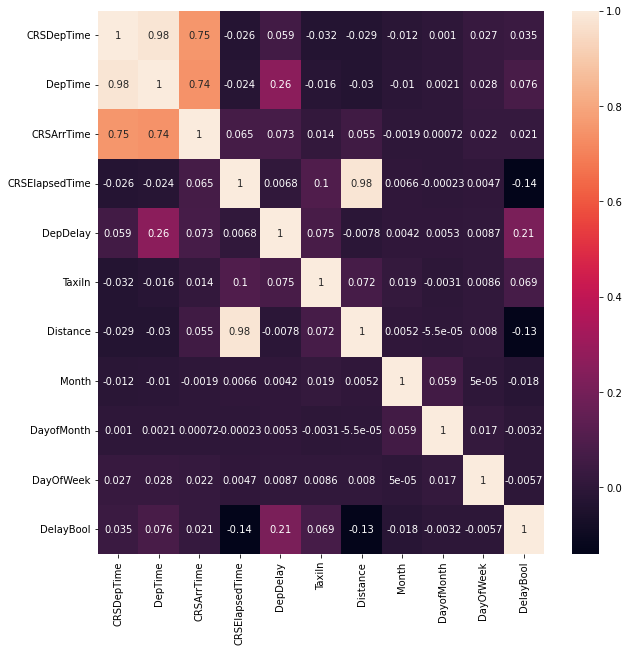

In [40]:
plt.figure(figsize=(10, 10))

sbrn.heatmap(data=flights_clean.corr(), annot=True);

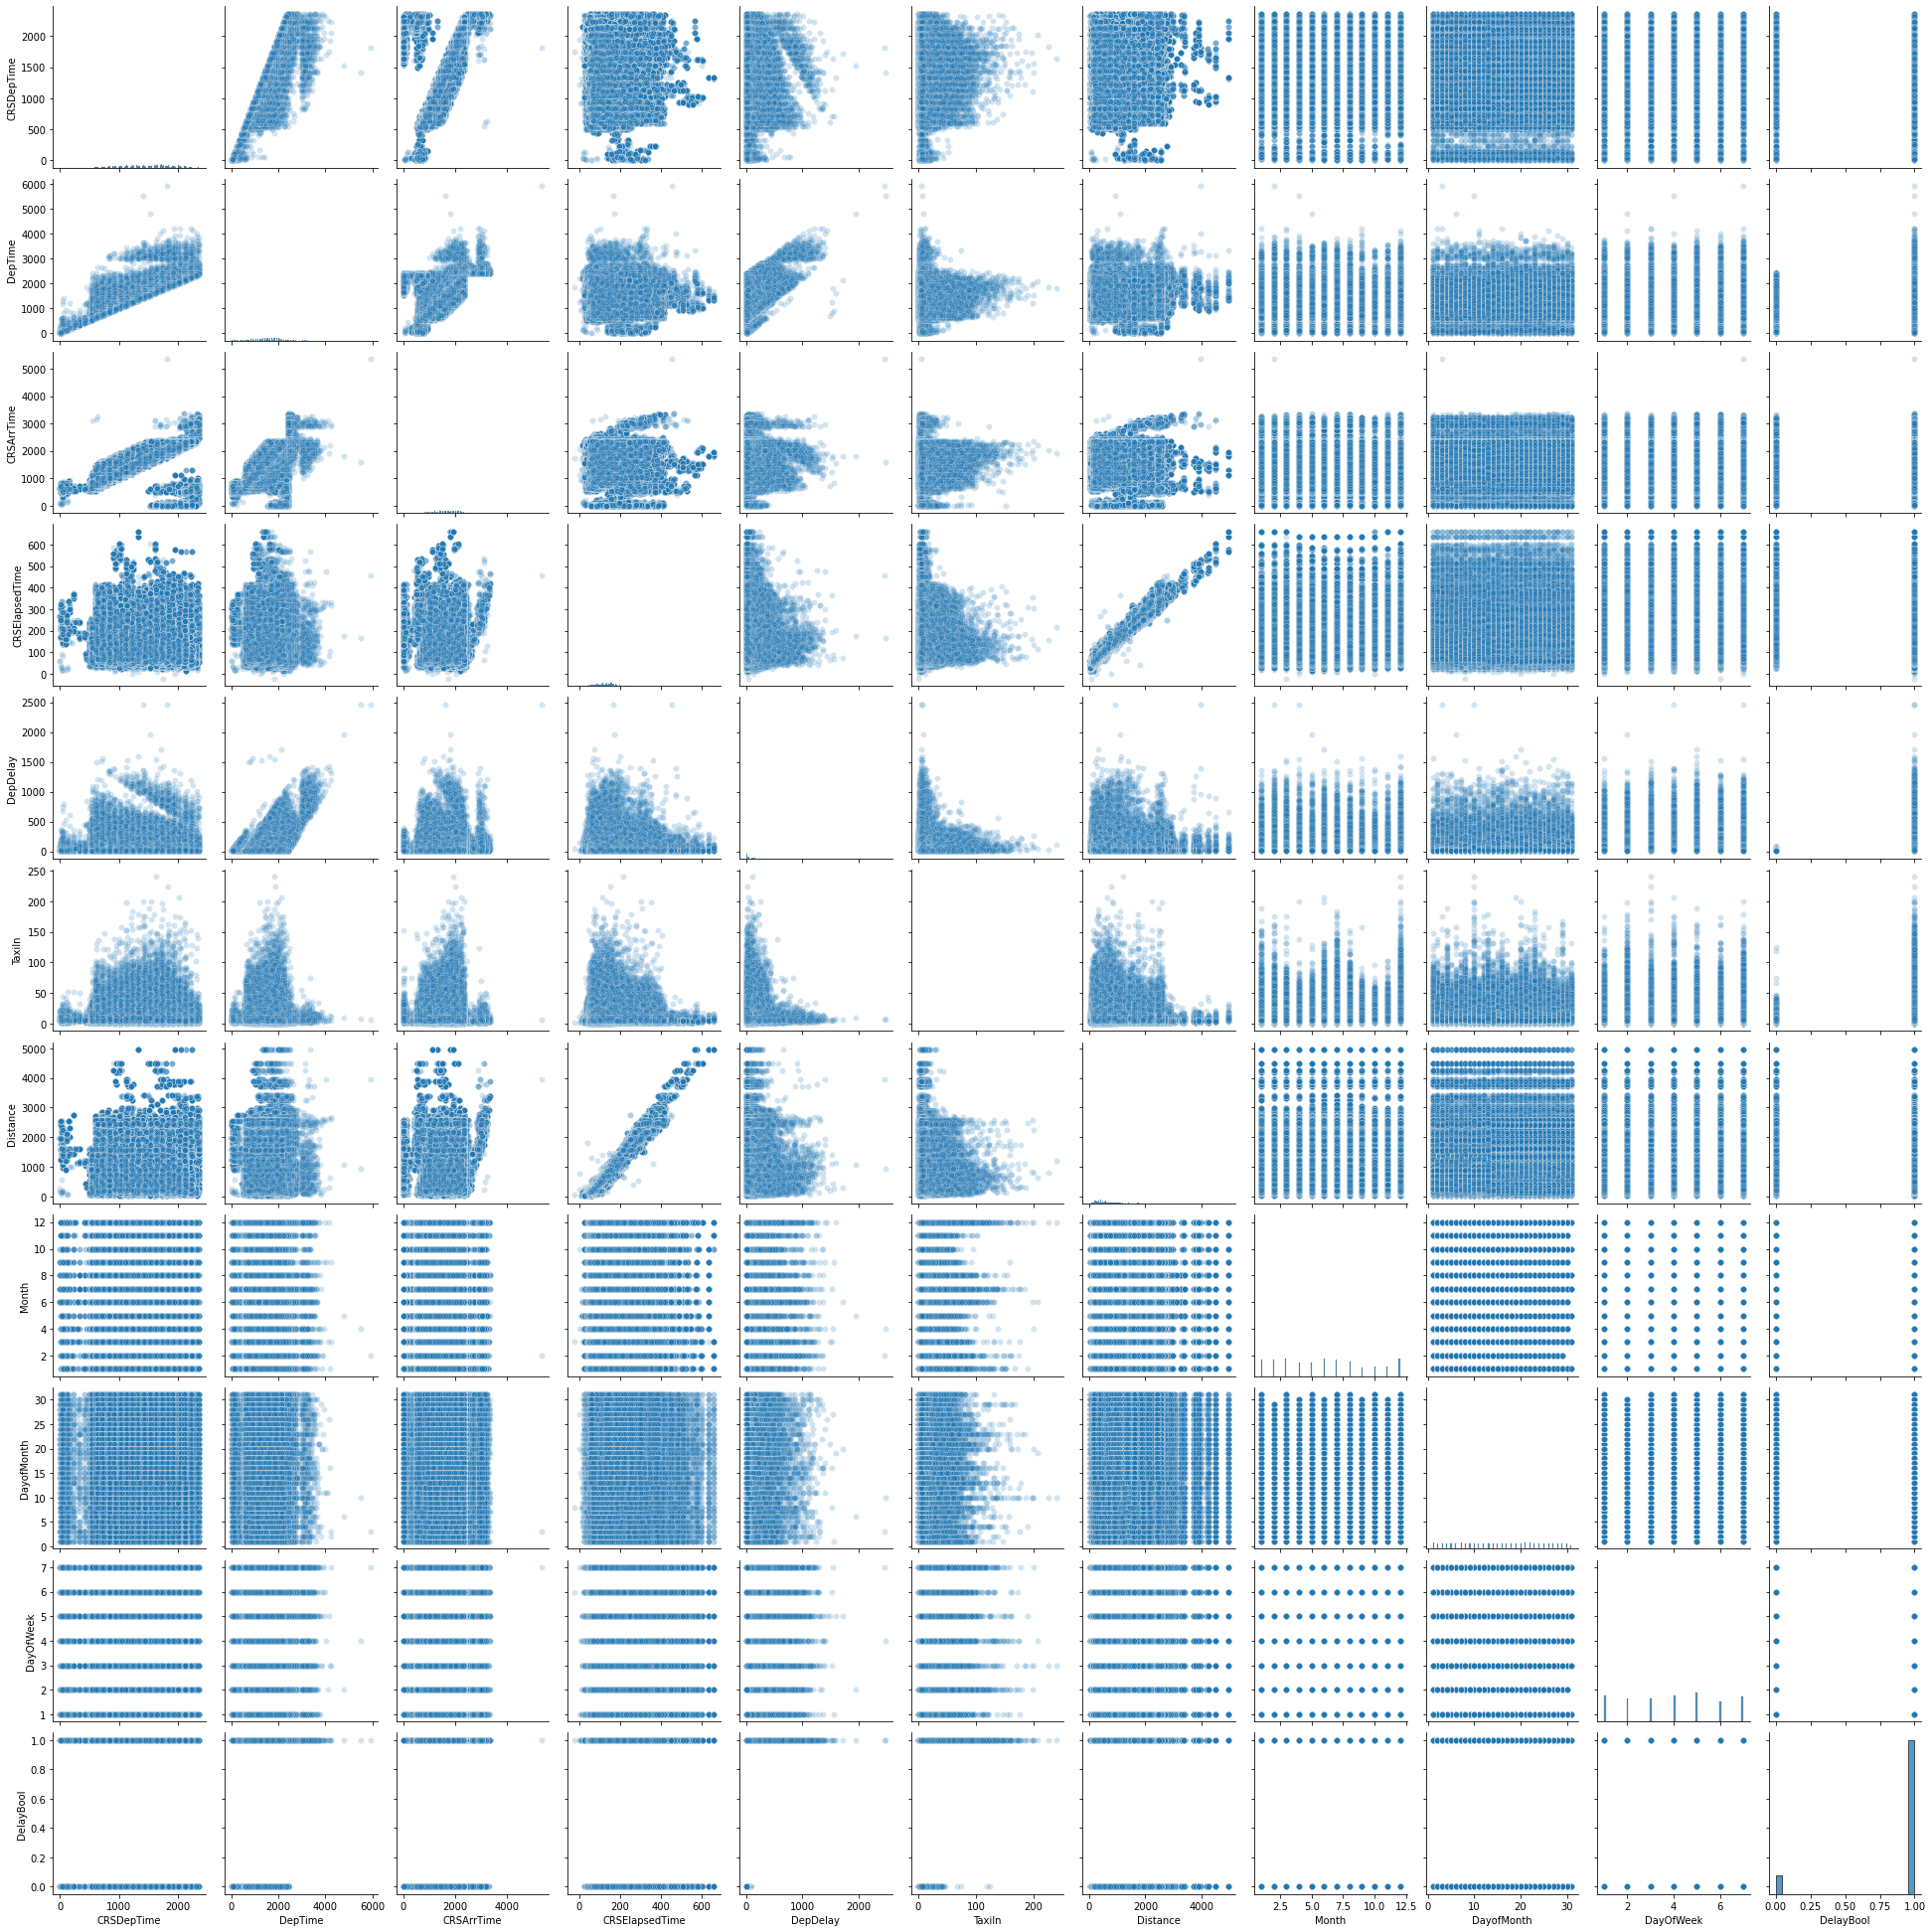

In [42]:
sbrn.pairplot(flights_clean, diag_kind='hist', plot_kws={'alpha':0.2});

Guardo el nuevo dataframe en un CSV (esta vez con nombre **DelayedFlights_clean2.csv**), para poder hacer diferentes pruebas a partir de este punto con más facilidad:

In [43]:
flights_clean.to_csv('./output/DelayedFlights_clean2.csv', index=False)

---

## Transformación

In [44]:
# Importo el dataframe "flights_clean" (que en este caso está guardado como "DelayedFlights_clean2.csv":
flights_clean = pandas.read_csv('./output/DelayedFlights_clean2.csv')

Escalo las columnas numéricas con **StandardScaler**:

In [45]:
# Importo la función "StandardScaler":
from sklearn.preprocessing import StandardScaler

# Almaceno en una lista las columnas con valores numéricos, pero excluyo la columna "DelayBool", que no quiero transformar:
int_cols = ['CRSDepTime','DepTime','CRSArrTime','CRSElapsedTime','DepDelay','TaxiIn','Distance','Month','DayofMonth','DayOfWeek']

# Uso la función "fit_transform" para escalar las variables almacenadas en "int_cols":
scaled_std = StandardScaler().fit_transform(flights_clean[int_cols])

# Guardo los resultados en un dataframe:
flights_num_std = pandas.DataFrame(scaled_std, columns=int_cols)

# Añado al nuevo dataframe la columna 'DelayBool', sin transformar:
flights_num_std['DelayBool'] = flights_clean['DelayBool']

flights_num_std

CRSDepTime   DepTime  CRSArrTime  CRSElapsedTime  DepDelay    TaxiIn  \
0          1.147281  1.056346    1.249425        0.221839 -0.658801 -0.533668   
1         -1.725146 -1.783886   -1.386213        0.151647 -0.452290 -0.343844   
2         -1.995907 -2.070411   -1.924098       -0.620463 -0.658801 -0.723491   
3          0.676392  0.660669    0.603962       -0.620463 -0.170685 -0.723491   
4          1.053104  0.913084    1.001997       -0.269504 -0.339648 -0.533668   
...             ...       ...         ...             ...       ...       ...   
1928366   -0.583238 -0.655980   -0.198562        0.249916 -0.245780  0.415450   
1928367   -2.042996 -2.004465   -1.926250       -0.353734  0.261110  1.554392   
1928368   -1.461447 -1.208563   -1.364698        0.123570  0.692906  0.225627   
1928369   -0.536149 -0.653706   -0.445990       -0.241427 -0.602480  1.174744   
1928370   -0.858709 -0.974341   -0.486869        0.011263 -0.677575  0.225627   

         Distance     Month  DayofMonth  DayOfWeek  DelayBool  
0        0.078502 -1.467457   -1.452968   0.007515          0  
1        0.078502 -1.467457   -1.452968   0.007515          1  
2       -0.435537 -1.467457   -1.452968   0.007515          1  
3       -0.435537 -1.467457   -1.452968   0.007515          1  
4       -0.134084 -1.467457   -1.452968   0.007515          1  
...           ...       ...         ...        ...        ...  
1928366  0.245783  1.692779   -0.313570   1.009494          1  
1928367 -0.494783  1.692779   -0.313570   1.009494          1  
1928368 -0.132341  1.692779   -0.313570   1.009494          1  
1928369 -0.404172  1.692779   -0.313570   1.009494          1  
1928370  0.190023  1.692779   -0.313570   1.009494          0  

[1928371 rows x 11 columns]

Codifico las columnas categóricas con **get_dummies**:

In [46]:
# Codifico los valores de la columna 'UniqueCarrier':
flights_dumm_carrier = pandas.get_dummies(flights_clean['UniqueCarrier'], prefix='Carrier')

flights_dumm_carrier

Carrier_9E  Carrier_AA  Carrier_AQ  Carrier_AS  Carrier_B6  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Carrier_CO  Carrier_DL  Carrier_EV  Carrier_F9  Carrier_FL  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           1           0           0           0   
1928367           0           1           0           0           0   
1928368           0           1           0           0           0   
1928369           0           1           0           0           0   
1928370           0           1           0           0           0   

         Carrier_HA  Carrier_MQ  Carrier_NW  Carrier_OH  Carrier_OO  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Carrier_UA  Carrier_US  Carrier_WN  Carrier_XE  Carrier_YV  
0                 0           0           1           0           0  
1                 0           0           1           0           0  
2                 0           0           1           0           0  
3                 0           0           1           0           0  
4                 0           0           1           0           0  
...             ...         ...         ...         ...         ...  
1928366           0           0           0           0           0  
1928367           0           0           0           0           0  
1928368           0           0           0           0           0  
1928369           0           0           0           0           0  
1928370           0           0           0           0           0  

[1928371 rows x 20 columns]

In [47]:
# Codifico los valores de la columna 'Origin':
flights_dumm_origin = pandas.get_dummies(flights_clean['Origin'], prefix='Origin')

flights_dumm_origin

Origin_ABE  Origin_ABI  Origin_ABQ  Origin_ABY  Origin_ACK  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Origin_ACT  Origin_ACV  Origin_ACY  Origin_ADK  Origin_ADQ  ...  \
0                 0           0           0           0           0  ...   
1                 0           0           0           0           0  ...   
2                 0           0           0           0           0  ...   
3                 0           0           0           0           0  ...   
4                 0           0           0           0           0  ...   
...             ...         ...         ...         ...         ...  ...   
1928366           0           0           0           0           0  ...   
1928367           0           0           0           0           0  ...   
1928368           0           0           0           0           0  ...   
1928369           0           0           0           0           0  ...   
1928370           0           0           0           0           0  ...   

         Origin_TYR  Origin_TYS  Origin_VLD  Origin_VPS  Origin_WRG  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Origin_WYS  Origin_XNA  Origin_YAK  Origin_YKM  Origin_YUM  
0                 0           0           0           0           0  
1                 0           0           0           0           0  
2                 0           0           0           0           0  
3                 0           0           0           0           0  
4                 0           0           0           0           0  
...             ...         ...         ...         ...         ...  
1928366           0           0           0           0           0  
1928367           0           0           0           0           0  
1928368           0           0           0           0           0  
1928369           0           0           0           0           0  
1928370           0           0           0           0           0  

[1928371 rows x 303 columns]

In [48]:
# Codifico los valores de la columna 'Dest':
flights_dumm_dest = pandas.get_dummies(flights_clean['Dest'], prefix='Dest')

flights_dumm_dest

Dest_ABE  Dest_ABI  Dest_ABQ  Dest_ABY  Dest_ACK  Dest_ACT  Dest_ACV  \
0               0         0         0         0         0         0         0   
1               0         0         0         0         0         0         0   
2               0         0         0         0         0         0         0   
3               0         0         0         0         0         0         0   
4               0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
1928366         0         0         0         0         0         0         0   
1928367         0         0         0         0         0         0         0   
1928368         0         0         0         0         0         0         0   
1928369         0         0         0         0         0         0         0   
1928370         0         0         0         0         0         0         0   

         Dest_ACY  Dest_ADK  Dest_ADQ  ...  Dest_TYR  Dest_TYS  Dest_VLD  \
0               0         0         0  ...         0         0         0   
1               0         0         0  ...         0         0         0   
2               0         0         0  ...         0         0         0   
3               0         0         0  ...         0         0         0   
4               0         0         0  ...         0         0         0   
...           ...       ...       ...  ...       ...       ...       ...   
1928366         0         0         0  ...         0         0         0   
1928367         0         0         0  ...         0         0         0   
1928368         0         0         0  ...         0         0         0   
1928369         0         0         0  ...         0         0         0   
1928370         0         0         0  ...         0         0         0   

         Dest_VPS  Dest_WRG  Dest_WYS  Dest_XNA  Dest_YAK  Dest_YKM  Dest_YUM  
0               0         0         0         0         0         0         0  
1               0         0         0         0         0         0         0  
2               0         0         0         0         0         0         0  
3               0         0         0         0         0         0         0  
4               0         0         0         0         0         0         0  
...           ...       ...       ...       ...       ...       ...       ...  
1928366         0         0         0         0         0         0         0  
1928367         0         0         0         0         0         0         0  
1928368         0         0         0         0         0         0         0  
1928369         0         0         0         0         0         0         0  
1928370         0         0         0         0         0         0         0  

[1928371 rows x 302 columns]

Concateno los 4 dataframes, para construir el dataframe que utilizaré para aplicar los modelos de Machine Learning:

In [49]:
flights_scaled_std = pandas.concat([flights_num_std, flights_dumm_carrier, flights_dumm_origin, flights_dumm_dest], axis='columns')

flights_scaled_std

CRSDepTime   DepTime  CRSArrTime  CRSElapsedTime  DepDelay    TaxiIn  \
0          1.147281  1.056346    1.249425        0.221839 -0.658801 -0.533668   
1         -1.725146 -1.783886   -1.386213        0.151647 -0.452290 -0.343844   
2         -1.995907 -2.070411   -1.924098       -0.620463 -0.658801 -0.723491   
3          0.676392  0.660669    0.603962       -0.620463 -0.170685 -0.723491   
4          1.053104  0.913084    1.001997       -0.269504 -0.339648 -0.533668   
...             ...       ...         ...             ...       ...       ...   
1928366   -0.583238 -0.655980   -0.198562        0.249916 -0.245780  0.415450   
1928367   -2.042996 -2.004465   -1.926250       -0.353734  0.261110  1.554392   
1928368   -1.461447 -1.208563   -1.364698        0.123570  0.692906  0.225627   
1928369   -0.536149 -0.653706   -0.445990       -0.241427 -0.602480  1.174744   
1928370   -0.858709 -0.974341   -0.486869        0.011263 -0.677575  0.225627   

         Distance     Month  DayofMonth  DayOfWeek  ...  Dest_TYR  Dest_TYS  \
0        0.078502 -1.467457   -1.452968   0.007515  ...         0         0   
1        0.078502 -1.467457   -1.452968   0.007515  ...         0         0   
2       -0.435537 -1.467457   -1.452968   0.007515  ...         0         0   
3       -0.435537 -1.467457   -1.452968   0.007515  ...         0         0   
4       -0.134084 -1.467457   -1.452968   0.007515  ...         0         0   
...           ...       ...         ...        ...  ...       ...       ...   
1928366  0.245783  1.692779   -0.313570   1.009494  ...         0         0   
1928367 -0.494783  1.692779   -0.313570   1.009494  ...         0         0   
1928368 -0.132341  1.692779   -0.313570   1.009494  ...         0         0   
1928369 -0.404172  1.692779   -0.313570   1.009494  ...         0         0   
1928370  0.190023  1.692779   -0.313570   1.009494  ...         0         0   

         Dest_VLD  Dest_VPS  Dest_WRG  Dest_WYS  Dest_XNA  Dest_YAK  Dest_YKM  \
0               0         0         0         0         0         0         0   
1               0         0         0         0         0         0         0   
2               0         0         0         0         0         0         0   
3               0         0         0         0         0         0         0   
4               0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
1928366         0         0         0         0         0         0         0   
1928367         0         0         0         0         0         0         0   
1928368         0         0         0         0         0         0         0   
1928369         0         0         0         0         0         0         0   
1928370         0         0         0         0         0         0         0   

         Dest_YUM  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1928366         0  
1928367         0  
1928368         0  
1928369         0  
1928370         0  

[1928371 rows x 636 columns]

Guardo el nuevo dataframe en un CSV (esta vez con nombre **DelayedFlights_scaled_std2.csv**), para poder hacer diferentes pruebas a partir de este punto con más facilidad:

In [50]:
flights_scaled_std.to_csv('./output/DelayedFlights_scaled_std2.csv', index=False)

---

## Exercici 1  
Crea almenys tres models de classificació diferents per intentar predir el millor possible l’endarreriment dels vols (**ArrDelay**) de **DelayedFlights.csv**.  
Considera si el vol ha arribat tard o no (**ArrDelay > 0**).

In [6]:
# Importo el dataframe "flights_scaled_std" (que en este caso está guardado como "DelayedFlights_scaled_std2.csv"):
flights_scaled_std = pandas.read_csv('./output/DelayedFlights_scaled_std2.csv')

In [2]:
# Importo librerias para aplicar y evaluar los modelos:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Logistic Regression**  
NOTA: Tuve que aumentar el valor del parámetro **max_iter** a **1000** (siendo **100** el valor por defecto), porque con valores inferiores da error de falta de convergencia, por haber llegado al límite de iteraciones.

In [8]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "LogisticRegression", y la aplico sobre "X" e "y":
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
log_reg_pred = log_reg.predict(X)

Wall time: 16min 46s


In [9]:
# Obtengo y almaceno la métrica "Accuracy":
log_reg_ACC = accuracy_score(y, log_reg_pred)

# Obtengo y almaceno la métrica "Precission":
log_reg_PREC = precision_score(y, log_reg_pred)

# Obtengo y almaceno la métrica "Recall":
log_reg_REC = recall_score(y, log_reg_pred)

# Obtengo y almaceno la métrica "F1":
log_reg_F1 = f1_score(y, log_reg_pred)

print("Logistic Regression Metrics:")
print("--------------------------")
print(f"Accuracy: {log_reg_ACC:.3f}")
print(f"Precission: {log_reg_PREC:.3f}")
print(f"Recall: {log_reg_REC:.3f}")
print(f"F1 Score: {log_reg_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, log_reg_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, log_reg_pred))

Logistic Regression Metrics:
--------------------------
Accuracy: 0.901
Precission: 0.918
Recall: 0.977
F1 Score: 0.946
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.26      0.36    204956
           1       0.92      0.98      0.95   1723415

    accuracy                           0.90   1928371
   macro avg       0.75      0.62      0.65   1928371
weighted avg       0.88      0.90      0.88   1928371

--------------------------
Confussion Matrix:
[[  53734  151222]
 [  39264 1684151]]


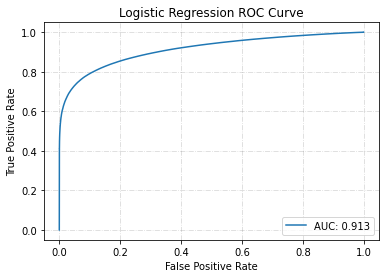

In [10]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
log_reg_pred_prob = log_reg.predict_proba(X)[: , 1]
log_reg_FPR, log_reg_TPR, thresholds = roc_curve(y, log_reg_pred_prob)
log_reg_AUC = roc_auc_score(y, log_reg_pred_prob)

plt.plot(log_reg_FPR, log_reg_TPR, label = "AUC: " + str(round(log_reg_AUC, 3)))
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Decission Tree**

In [11]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "DecisionTreeClassifier", y la aplico sobre "X" e "y":
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
dec_tree_pred = dec_tree.predict(X)

Wall time: 4min 14s


In [12]:
# Obtengo y almaceno la métrica "Accuracy":
dec_tree_ACC = accuracy_score(y, dec_tree_pred)

# Obtengo y almaceno la métrica "Precission":
dec_tree_PREC = precision_score(y, dec_tree_pred)

# Obtengo y almaceno la métrica "Recall":
dec_tree_REC = recall_score(y, dec_tree_pred)

# Obtengo y almaceno la métrica "F1":
dec_tree_F1 = f1_score(y, dec_tree_pred)

print("Decission Tree Metrics:")
print("--------------------------")
print(f"Accuracy: {dec_tree_ACC:.3f}")
print(f"Precission: {dec_tree_PREC:.3f}")
print(f"Recall: {dec_tree_REC:.3f}")
print(f"F1 Score: {dec_tree_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, dec_tree_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, dec_tree_pred))

Decission Tree Metrics:
--------------------------
Accuracy: 1.000
Precission: 1.000
Recall: 1.000
F1 Score: 1.000
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    204956
           1       1.00      1.00      1.00   1723415

    accuracy                           1.00   1928371
   macro avg       1.00      1.00      1.00   1928371
weighted avg       1.00      1.00      1.00   1928371

--------------------------
Confussion Matrix:
[[ 204956       0]
 [      0 1723415]]


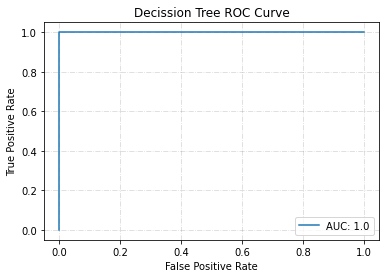

In [13]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
dec_tree_pred_prob = dec_tree.predict_proba(X)[: , 1]
dec_tree_FPR, dec_tree_TPR, thresholds = roc_curve(y, dec_tree_pred_prob)
dec_tree_AUC = roc_auc_score(y, dec_tree_pred_prob)

plt.plot(dec_tree_FPR, dec_tree_TPR, label = "AUC: " + str(round(dec_tree_AUC, 3)))
plt.title('Decission Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Random Forest**

In [49]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "RandomForestClassifier", y la aplico sobre "X" e "y":
rndm_forst = RandomForestClassifier()
rndm_forst.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
rndm_forst_pred = rndm_forst.predict(X)

Wall time: 24min 33s


In [50]:
# Obtengo y almaceno la métrica "Accuracy":
rndm_forst_ACC = accuracy_score(y, rndm_forst_pred)

# Obtengo y almaceno la métrica "Precission":
rndm_forst_PREC = precision_score(y, rndm_forst_pred)

# Obtengo y almaceno la métrica "Recall":
rndm_forst_REC = recall_score(y, rndm_forst_pred)

# Obtengo y almaceno la métrica "F1":
rndm_forst_F1 = f1_score(y, rndm_forst_pred)

print("Random Forest Metrics:")
print("--------------------------")
print(f"Accuracy: {rndm_forst_ACC:.3f}")
print(f"Precission: {rndm_forst_PREC:.3f}")
print(f"Recall: {rndm_forst_REC:.3f}")
print(f"F1 Score: {rndm_forst_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, rndm_forst_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, rndm_forst_pred))

Random Forest Metrics:
--------------------------
Accuracy: 1.000
Precission: 1.000
Recall: 1.000
F1 Score: 1.000
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    204956
           1       1.00      1.00      1.00   1723415

    accuracy                           1.00   1928371
   macro avg       1.00      1.00      1.00   1928371
weighted avg       1.00      1.00      1.00   1928371

--------------------------
Confussion Matrix:
[[ 204951       5]
 [      0 1723415]]


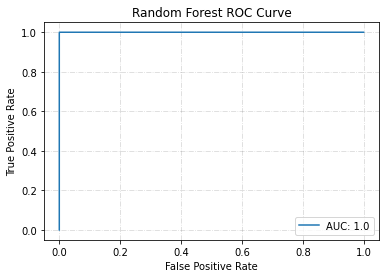

In [51]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
rndm_forst_pred_prob = rndm_forst.predict_proba(X)[: , 1]
rndm_forst_FPR, rndm_forst_TPR, thresholds = roc_curve(y, rndm_forst_pred_prob)
rndm_forst_AUC = roc_auc_score(y, rndm_forst_pred_prob)

plt.plot(rndm_forst_FPR, rndm_forst_TPR, label = "AUC: " + str(round(rndm_forst_AUC, 3)))
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**XGBoost**  
NOTA: Tuve que añadir los parámetros **use_label_encoder=False** y **eval_metric='logloss'**, porque sin ellos devuelve errores (bueno, más bien warnings).

In [58]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "XGBClassifier", y la aplico sobre "X" e "y":
xgb_class = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_class.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
xgb_class_pred = xgb_class.predict(X)

Wall time: 14min 41s


In [59]:
# Obtengo y almaceno la métrica "Accuracy":
xgb_class_ACC = accuracy_score(y, xgb_class_pred)

# Obtengo y almaceno la métrica "Precission":
xgb_class_PREC = precision_score(y, xgb_class_pred)

# Obtengo y almaceno la métrica "Recall":
xgb_class_REC = recall_score(y, xgb_class_pred)

# Obtengo y almaceno la métrica "F1":
xgb_class_F1 = f1_score(y, xgb_class_pred)

print("XGBoost Metrics:")
print("--------------------------")
print(f"Accuracy: {xgb_class_ACC:.3f}")
print(f"Precission: {xgb_class_PREC:.3f}")
print(f"Recall: {xgb_class_REC:.3f}")
print(f"F1 Score: {xgb_class_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, xgb_class_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, xgb_class_pred))

XGBoost Metrics:
--------------------------
Accuracy: 0.907
Precission: 0.920
Recall: 0.982
F1 Score: 0.950
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.28      0.39    204956
           1       0.92      0.98      0.95   1723415

    accuracy                           0.91   1928371
   macro avg       0.78      0.63      0.67   1928371
weighted avg       0.89      0.91      0.89   1928371

--------------------------
Confussion Matrix:
[[  56869  148087]
 [  31424 1691991]]


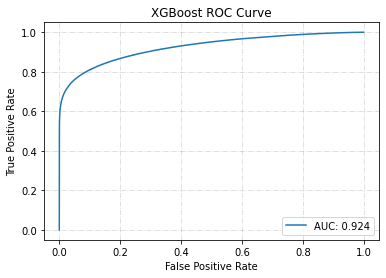

In [60]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
xgb_class_pred_prob = xgb_class.predict_proba(X)[: , 1]
xgb_class_FPR, xgb_class_TPR, thresholds = roc_curve(y, xgb_class_pred_prob)
xgb_class_AUC = roc_auc_score(y, xgb_class_pred_prob)

plt.plot(xgb_class_FPR, xgb_class_TPR, label = "AUC: " + str(round(xgb_class_AUC, 3)))
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

> Intenté probar los modelos **K-Nearest Neighbors** y **Support Vector Machines**, pero tuve que detener su ejecución porque tardaban una eternidad (el primero llevaba más de 15 horas). Supongo que son inviables con datasets tan extensos como este, y con tantas columnas dummies.  
> El modelo **Logistic Regression** dio resultados bastante buenos, y el tiempo de ejecución fue bastante ajustado (aunque mayor al que esperaba).  
> El modelo **Decission Tree** parece que tiene una acusada tendencia al **overfiting**, tanto en su versión para regresión como en su versión para clasificación, porque ha vuelto a clavar las métricas al máximo posible. Intentaré mejorarlo modificando parámetros.  
> Esperaba que el modelo **Random Forest** tardara demasiado tiempo (como su versión para regresión), pero tardó menos de media hora, y también pecó de **overfitting**, por lo que tendré que intentar mejorarlo modificando parámetros.  
> El modelo **XGBoost** es el que obtuvo las mejores métricas (obviando los modelos con **overfitting**) superando al modelo **Logistic Regression** en todas ellas, y en un tiempo más que razonable.

---
## Exercici 2  
Compara els models de classificació utilitzant la precisió (**accuracy**), una **matriu de confiança** i d’**altres mètriques** més avançades.

En el ejercicio anterior he imprimido todas las métricas, matrices de confusión y curvas ROC, así que aquí intentaré comparar las métricas **Accuracy**, **Precission**, **Recall**, **F1** y **AUC**, mediante una única gráfica que las incluya todas.

In [83]:
# Almaceno los resultados en un dataframe:
clasiff_metrics = pandas.DataFrame({
                                'Name': ['LogisticReg_Std','DecissionTree_Std','RandomForest_Std','XGBoost_Std'],
                                'Model': ['Logistic Regression','Decission Tree','Random Forest','XGBoost'],
                                'Params': ['max_iter=1000', '', '', 'use_label_encoder=False | eval_metric="logloss"'],
                                'Accuracy': [round(log_reg_ACC,3), round(dec_tree_ACC,3), round(rndm_forst_ACC,3), round(xgb_class_ACC,3)],
                                'Precission': [round(log_reg_PREC,3), round(dec_tree_PREC,3), round(rndm_forst_PREC,3), round(xgb_class_PREC,3)],
                                'Recall': [round(log_reg_REC,3), round(dec_tree_REC,3), round(rndm_forst_REC,3), round(xgb_class_REC,3)],
                                'F1': [round(log_reg_F1,3), round(dec_tree_F1,3), round(rndm_forst_F1,3), round(xgb_class_F1,3)],
                                'AUC': [round(log_reg_AUC,3), round(dec_tree_AUC,3), round(rndm_forst_AUC,3), round(xgb_class_AUC,3)]
                                })
clasiff_metrics

Name                Model  \
0    LogisticReg_Std  Logistic Regression   
1  DecissionTree_Std       Decission Tree   
2   RandomForest_Std        Random Forest   
3        XGBoost_Std              XGBoost   

                                            Params  Accuracy  Precission  \
0                                    max_iter=1000     0.901       0.918   
1                                                      1.000       1.000   
2                                                      1.000       1.000   
3  use_label_encoder=False | eval_metric="logloss"     0.907       0.920   

   Recall     F1    AUC  
0   0.977  0.946  0.913  
1   1.000  1.000  1.000  
2   1.000  1.000  1.000  
3   0.982  0.950  0.924

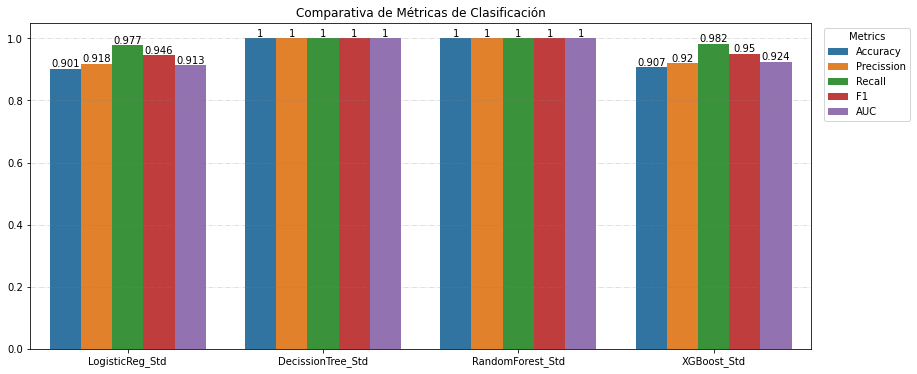

In [84]:
# Utilizo la función "melt" para crear un dataframe con el que poder graficar todas las métricas:
melt_df = clasiff_metrics[['Name','Accuracy','Precission','Recall','F1','AUC']].melt('Name', var_name='Metric')

# Creo una gráfica en base al dataframe "melt_df":
plt.figure(figsize=(14, 6))

ax = sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(title='Metrics', bbox_to_anchor=(1.01, 1))
plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas de Clasificación")
plt.xlabel('')
plt.ylabel('')
plt.show()

In [85]:
# Guardo el dataframe de resultados en un CSV, para poder recuperarlo posteriormente:
clasiff_metrics.to_csv('./output/clasiff_metrics.csv', index=False)

> Personalmente, creo que en este ejercicio la métrica más importante es **Recall**, porque interesa detectar todos los positivos posibles (o sea, retrasos), aunque sea a costa de devolver una mayor cantidad de falsos positivos (empeorando la métrica **Precission**), pero prestando atención también a la métrica **F1** (que incluye las 2 anteriores). Se trata de maximizar la métrica **Recall**, pero manteniendo la métrica **Precission** en valores aceptables.  
> La métrica **Accuracy** también es importante, pero en casos como este puede ser engañosa, porque la cantidad de Positivos reales y Negativos reales no está blanceada en este dataset (hay unas 8 veces más casos Positivos que Negativos).

---
## Exercici 3  
Entrena’ls utilitzant els diferents paràmetres que admeten.

In [3]:
# Importo el dataframe "flights_scaled_std" (que en este caso está guardado como "DelayedFlights_scaled_std2.csv"):
flights_scaled_std = pandas.read_csv('./output/DelayedFlights_scaled_std2.csv')

**Logistic Regression**  
Añadiré el parámetro **solver** con valor **saga**, que en teoría puede dar mejores resultados en datasets extensos (su valor por defecto es **lbfgs**):

In [5]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "LogisticRegression", y la aplico sobre "X" e "y":
log_reg2 = LogisticRegression(max_iter=1000, solver='saga')
log_reg2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
log_reg2_pred = log_reg2.predict(X)

Wall time: 1h 54min 55s


In [6]:
# Obtengo y almaceno la métrica "Accuracy":
log_reg2_ACC = accuracy_score(y, log_reg2_pred)

# Obtengo y almaceno la métrica "Precission":
log_reg2_PREC = precision_score(y, log_reg2_pred)

# Obtengo y almaceno la métrica "Recall":
log_reg2_REC = recall_score(y, log_reg2_pred)

# Obtengo y almaceno la métrica "F1":
log_reg2_F1 = f1_score(y, log_reg2_pred)

print("Logistic Regression Metrics:")
print("--------------------------")
print(f"Accuracy: {log_reg2_ACC:.3f}")
print(f"Precission: {log_reg2_PREC:.3f}")
print(f"Recall: {log_reg2_REC:.3f}")
print(f"F1 Score: {log_reg2_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, log_reg2_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, log_reg2_pred))

Logistic Regression Metrics:
--------------------------
Accuracy: 0.901
Precission: 0.918
Recall: 0.977
F1 Score: 0.946
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.26      0.36    204956
           1       0.92      0.98      0.95   1723415

    accuracy                           0.90   1928371
   macro avg       0.75      0.62      0.65   1928371
weighted avg       0.88      0.90      0.88   1928371

--------------------------
Confussion Matrix:
[[  53716  151240]
 [  39262 1684153]]


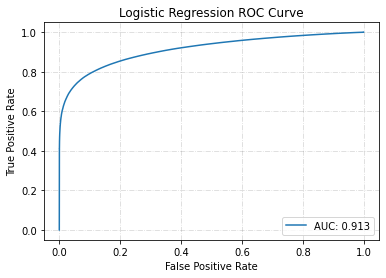

In [7]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
log_reg2_pred_prob = log_reg2.predict_proba(X)[: , 1]
log_reg2_FPR, log_reg2_TPR, thresholds = roc_curve(y, log_reg2_pred_prob)
log_reg2_AUC = roc_auc_score(y, log_reg2_pred_prob)

plt.plot(log_reg2_FPR, log_reg2_TPR, label = "AUC: " + str(round(log_reg2_AUC, 3)))
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Decission Tree**  
Intentaré solventar el problema que tiene este modelo con el **overfitting**, mediante el parámetro **max_depth=5**:

In [8]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "DecisionTreeClassifier", y la aplico sobre "X" e "y":
dec_tree2 = DecisionTreeClassifier(max_depth=5)
dec_tree2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
dec_tree2_pred = dec_tree2.predict(X)

Wall time: 1min 39s


In [9]:
# Obtengo y almaceno la métrica "Accuracy":
dec_tree2_ACC = accuracy_score(y, dec_tree2_pred)

# Obtengo y almaceno la métrica "Precission":
dec_tree2_PREC = precision_score(y, dec_tree2_pred)

# Obtengo y almaceno la métrica "Recall":
dec_tree2_REC = recall_score(y, dec_tree2_pred)

# Obtengo y almaceno la métrica "F1":
dec_tree2_F1 = f1_score(y, dec_tree2_pred)

print("Decission Tree Metrics:")
print("--------------------------")
print(f"Accuracy: {dec_tree2_ACC:.3f}")
print(f"Precission: {dec_tree2_PREC:.3f}")
print(f"Recall: {dec_tree2_REC:.3f}")
print(f"F1 Score: {dec_tree2_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, dec_tree2_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, dec_tree2_pred))

Decission Tree Metrics:
--------------------------
Accuracy: 0.896
Precission: 0.900
Recall: 0.994
F1 Score: 0.945
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.07      0.13    204956
           1       0.90      0.99      0.94   1723415

    accuracy                           0.90   1928371
   macro avg       0.74      0.53      0.54   1928371
weighted avg       0.87      0.90      0.86   1928371

--------------------------
Confussion Matrix:
[[  15242  189714]
 [  10992 1712423]]


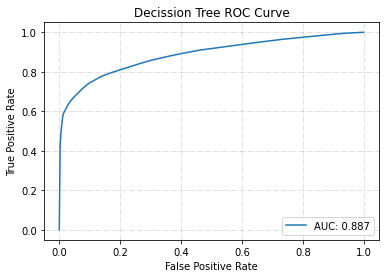

In [10]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
dec_tree2_pred_prob = dec_tree2.predict_proba(X)[: , 1]
dec_tree2_FPR, dec_tree2_TPR, thresholds = roc_curve(y, dec_tree2_pred_prob)
dec_tree2_AUC = roc_auc_score(y, dec_tree2_pred_prob)

plt.plot(dec_tree2_FPR, dec_tree2_TPR, label = "AUC: " + str(round(dec_tree2_AUC, 3)))
plt.title('Decission Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Random Forest**  
Como en este ejercicio este modelo ha causado **overfitting**, también intentaré solucionarlo con el parámetro **max_depth=5**:

In [11]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "RandomForestClassifier", y la aplico sobre "X" e "y":
rndm_forst2 = RandomForestClassifier(max_depth=5)
rndm_forst2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
rndm_forst2_pred = rndm_forst2.predict(X)

Wall time: 3min 4s


In [12]:
# Obtengo y almaceno la métrica "Accuracy":
rndm_forst2_ACC = accuracy_score(y, rndm_forst2_pred)

# Obtengo y almaceno la métrica "Precission":
rndm_forst2_PREC = precision_score(y, rndm_forst2_pred)

# Obtengo y almaceno la métrica "Recall":
rndm_forst2_REC = recall_score(y, rndm_forst2_pred)

# Obtengo y almaceno la métrica "F1":
rndm_forst2_F1 = f1_score(y, rndm_forst2_pred)

print("Random Forest Metrics:")
print("--------------------------")
print(f"Accuracy: {rndm_forst2_ACC:.3f}")
print(f"Precission: {rndm_forst2_PREC:.3f}")
print(f"Recall: {rndm_forst2_REC:.3f}")
print(f"F1 Score: {rndm_forst2_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, rndm_forst2_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, rndm_forst2_pred))

Random Forest Metrics:
--------------------------
Accuracy: 0.894
Precission: 0.894
Recall: 1.000
F1 Score: 0.944
--------------------------
Classification Report:


c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\program files\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    204956
           1       0.89      1.00      0.94   1723415

    accuracy                           0.89   1928371
   macro avg       0.45      0.50      0.47   1928371
weighted avg       0.80      0.89      0.84   1928371

--------------------------
Confussion Matrix:
[[      0  204956]
 [      0 1723415]]


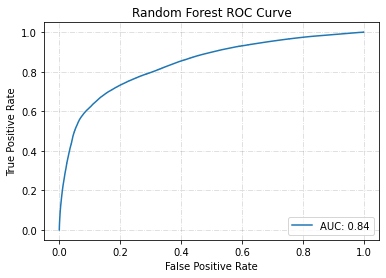

In [13]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
rndm_forst2_pred_prob = rndm_forst2.predict_proba(X)[: , 1]
rndm_forst2_FPR, rndm_forst2_TPR, thresholds = roc_curve(y, rndm_forst2_pred_prob)
rndm_forst2_AUC = roc_auc_score(y, rndm_forst2_pred_prob)

plt.plot(rndm_forst2_FPR, rndm_forst2_TPR, label = "AUC: " + str(round(rndm_forst2_AUC, 3)))
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**XGBoost**  
Añadiré el parámetro **scale_pos_weight** con el valor **0.12**, que es el resultado de dividir la cantidad de valores negativos en la variable **DelayBool** entre la cantidad de valores positivos (el valor por defecto de este parámetro es **1**, que es el valor correcto para datasets balanceados). Esto en teoría ayudaría a mejorar las predicciones en datasets no balanceados, como es el caso de este ejemplo.  
NOTA: Este modelo incluye muchísimos parámetros, que hay que estudiar con detenimiento, y también se pueden usar métodos con los que obtener los mejores parámetros (**GridSearchCV**, **RandomizedSearchCV**, etc). Está claro que esa es la vía para trabajar con este modelo, pero creo que de momento podemos conformarnos con probar la modificación del parámetro **scale_pos_weight** que acabo de explicar.

In [14]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "XGBClassifier", y la aplico sobre "X" e "y":
xgb_class2 = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=0.12)
xgb_class2.fit(X, y)

# Utilizo la función "predict" para hacer predicciones con el modelo:
xgb_class2_pred = xgb_class2.predict(X)

Wall time: 13min 50s


In [15]:
# Obtengo y almaceno la métrica "Accuracy":
xgb_class2_ACC = accuracy_score(y, xgb_class2_pred)

# Obtengo y almaceno la métrica "Precission":
xgb_class2_PREC = precision_score(y, xgb_class2_pred)

# Obtengo y almaceno la métrica "Recall":
xgb_class2_REC = recall_score(y, xgb_class2_pred)

# Obtengo y almaceno la métrica "F1":
xgb_class2_F1 = f1_score(y, xgb_class2_pred)

print("XGBoost Metrics:")
print("--------------------------")
print(f"Accuracy: {xgb_class2_ACC:.3f}")
print(f"Precission: {xgb_class2_PREC:.3f}")
print(f"Recall: {xgb_class2_REC:.3f}")
print(f"F1 Score: {xgb_class2_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y, xgb_class2_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y, xgb_class2_pred))

XGBoost Metrics:
--------------------------
Accuracy: 0.798
Precission: 0.990
Recall: 0.782
F1 Score: 0.874
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.93      0.50    204956
           1       0.99      0.78      0.87   1723415

    accuracy                           0.80   1928371
   macro avg       0.66      0.86      0.69   1928371
weighted avg       0.92      0.80      0.83   1928371

--------------------------
Confussion Matrix:
[[ 191425   13531]
 [ 375102 1348313]]


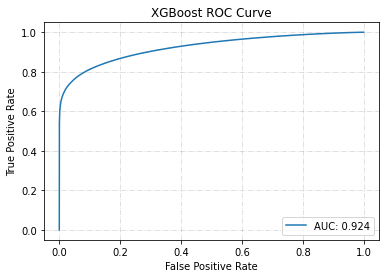

In [16]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
xgb_class2_pred_prob = xgb_class2.predict_proba(X)[: , 1]
xgb_class2_FPR, xgb_class2_TPR, thresholds = roc_curve(y, xgb_class2_pred_prob)
xgb_class2_AUC = roc_auc_score(y, xgb_class2_pred_prob)

plt.plot(xgb_class2_FPR, xgb_class2_TPR, label = "AUC: " + str(round(xgb_class2_AUC, 3)))
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

Comparativa de resultados:

In [23]:
# Importo el dataframe "classif_metrics":
clasiff_metrics = pandas.read_csv('./output/clasiff_metrics.csv')

In [24]:
# Añado los nuevos resultados al dataframe "classif_metrics":
clasiff_metrics.loc[len(clasiff_metrics)] = ['LogisticReg_Mod', 'Logistic Regression', 'max_iter=1000 | solver="saga"', round(log_reg2_ACC,3), round(log_reg2_PREC,3), round(log_reg2_REC,3), round(log_reg2_F1,3), round(log_reg2_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['DecissionTree_Mod', 'Decission Tree', 'max_depth=5', round(dec_tree2_ACC,3), round(dec_tree2_PREC,3), round(dec_tree2_REC,3), round(dec_tree2_F1,3), round(dec_tree2_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['RandomForest_Mod', 'Random Forest', 'max_depth=5', round(rndm_forst2_ACC,3), round(rndm_forst2_PREC,3), round(rndm_forst2_REC,3), round(rndm_forst2_F1,3), round(rndm_forst2_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['XGBoost_Mod', 'XGBoost', 'use_label_encoder=False | eval_metric="logloss" | scale_pos_weight=0.12', round(xgb_class2_ACC,3), round(xgb_class2_PREC,3), round(xgb_class2_REC,3), round(xgb_class2_F1,3), round(xgb_class2_AUC,3)]

clasiff_metrics

Name                Model  \
0    LogisticReg_Std  Logistic Regression   
1  DecissionTree_Std       Decission Tree   
2   RandomForest_Std        Random Forest   
3        XGBoost_Std              XGBoost   
4    LogisticReg_Mod  Logistic Regression   
5  DecissionTree_Mod       Decission Tree   
6   RandomForest_Mod        Random Forest   
7        XGBoost_Mod              XGBoost   

                                              Params  Accuracy  Precission  \
0                                      max_iter=1000     0.901       0.918   
1                                                NaN     1.000       1.000   
2                                                NaN     1.000       1.000   
3    use_label_encoder=False | eval_metric="logloss"     0.907       0.920   
4                      max_iter=1000 | solver="saga"     0.901       0.918   
5                                        max_depth=5     0.896       0.900   
6                                        max_depth=5     0.894       0.894   
7  use_label_encoder=False | eval_metric="logloss...     0.798       0.990   

   Recall     F1    AUC  
0   0.977  0.946  0.913  
1   1.000  1.000  1.000  
2   1.000  1.000  1.000  
3   0.982  0.950  0.924  
4   0.977  0.946  0.913  
5   0.994  0.945  0.887  
6   1.000  0.944  0.840  
7   0.782  0.874  0.924

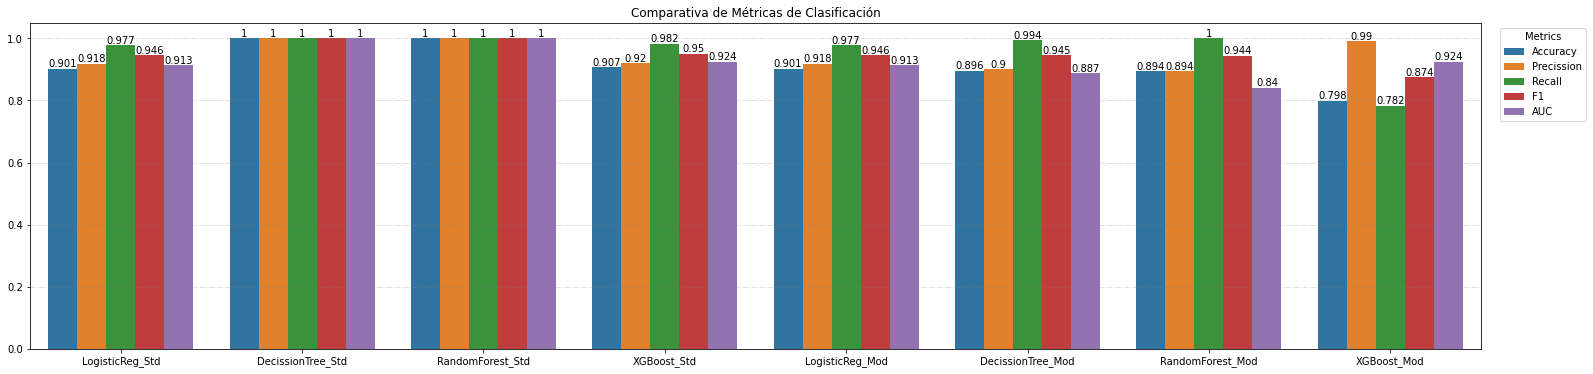

In [28]:
# Utilizo la función "melt" para crear un dataframe con el que poder graficar todas las métricas:
melt_df = clasiff_metrics[['Name','Accuracy','Precission','Recall','F1','AUC']].melt('Name', var_name='Metric')

# Creo una gráfica en base al dataframe "melt_df":
plt.figure(figsize=(26, 6))

ax = sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(title='Metrics', bbox_to_anchor=(1.01, 1))
plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa de Métricas de Clasificación")
plt.xlabel('')
plt.ylabel('')
plt.show()

In [29]:
# Guardo el dataframe de resultados en un CSV, para poder recuperarlo posteriormente:
clasiff_metrics.to_csv('./output/clasiff_metrics.csv', index=False)

> El modelo **Logistic Regression** devolvió exactamente los mismos resultados que en la prueba anterior (en todas las métricas), y tardó casi 8 veces más, así que no volveré a modificar el parámetro **solver** en estos ejercicios.  
> El modelo **Decission Tree** ya no causó **overfitting**, y obtuvo muy buenos resultados en la métrica **Recall** (y bastante buenos en la métrica **F1**), así que mantendré el parámetro **max_depth=5** en el resto de ejercicios.  
> Al modelo **Random_Forest** no le ha sentado bien el parámetro **max_depth=5**, devolviendo warnings al calcular la **Confussion Matrix**, y clavando la métrica **Recall** al máximo posible, pero no sé si fiarme de estos resultados, así que no volveré a modificar este parámetro en el modelo.  
> Por su parte, el modelo **XGBoost** tampoco ha dado buenos resultados con el parámetro **scale_pos_weight=0.12**, subiendo mucho la métrica **Precission**, pero a costa de la métrica **Recall** (que en este ejemplo nos interesa más). Tampoco volveré a modificar dicho parámetro en estos ejercicios.

---
## Exercici 4  
Compara el seu rendiment utilitzant l’aproximació **traint/test** o **cross-validation**.

Sería demasiado costoso (en tiempo) probar la técnica **cross-validation** en todos los modelos, pero no quiero dejar de probarla, así que voy a hacer lo siguiente:
- Aplicaré la técnica **train/test** sobre todos los modelos, y utilizaré los resultados para compararlos con los modelos que ejecutaré en los próximos ejercicios (porque los resultados son más fiables que cuando no hacemos splits).  
- Aplicaré la técnica **Stratified K-Fold** sobre el modelo **XGBoost**.  
- Compararé los resultados cuando se hacen splits y cuando no (separadamente por cada modelo), manteniendo los mismos parámetros, pera que la comparación sea válida.

In [3]:
# Importo las librerías que utilizaré en el ejercicio:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

In [4]:
# Importo el dataframe "flights_scaled_std" (que en este caso está guardado como "DelayedFlights_scaled_std2.csv"):
flights_scaled_std = pandas.read_csv('./output/DelayedFlights_scaled_std2.csv')

**Logistic Regression** (Train/Test Splits)

In [5]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "LogisticRegression", y la aplico sobre "X_train" e "y_train":
log_reg3 = LogisticRegression(max_iter=1000)
log_reg3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
log_reg3_pred = log_reg3.predict(X_test)

Wall time: 13min 28s


In [6]:
# Obtengo y almaceno la métrica "Accuracy":
log_reg3_ACC = accuracy_score(y_test, log_reg3_pred)

# Obtengo y almaceno la métrica "Precission":
log_reg3_PREC = precision_score(y_test, log_reg3_pred)

# Obtengo y almaceno la métrica "Recall":
log_reg3_REC = recall_score(y_test, log_reg3_pred)

# Obtengo y almaceno la métrica "F1":
log_reg3_F1 = f1_score(y_test, log_reg3_pred)

print("Logistic Regression Metrics:")
print("--------------------------")
print(f"Accuracy: {log_reg3_ACC:.3f}")
print(f"Precission: {log_reg3_PREC:.3f}")
print(f"Recall: {log_reg3_REC:.3f}")
print(f"F1 Score: {log_reg3_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, log_reg3_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, log_reg3_pred))

Logistic Regression Metrics:
--------------------------
Accuracy: 0.901
Precission: 0.918
Recall: 0.977
F1 Score: 0.947
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.26      0.36     40646
           1       0.92      0.98      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.74      0.62      0.65    385675
weighted avg       0.88      0.90      0.88    385675

--------------------------
Confussion Matrix:
[[ 10480  30166]
 [  7897 337132]]


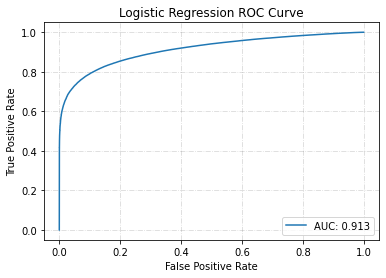

In [7]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
log_reg3_pred_prob = log_reg3.predict_proba(X_test)[: , 1]
log_reg3_FPR, log_reg3_TPR, thresholds = roc_curve(y_test, log_reg3_pred_prob)
log_reg3_AUC = roc_auc_score(y_test, log_reg3_pred_prob)

plt.plot(log_reg3_FPR, log_reg3_TPR, label = "AUC: " + str(round(log_reg3_AUC, 3)))
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Decission Tree** (Train/Test Splits)

In [8]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "DecisionTreeClassifier", y la aplico sobre "X_train" e "y_train":
dec_tree3 = DecisionTreeClassifier(max_depth=5)
dec_tree3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
dec_tree3_pred = dec_tree3.predict(X_test)

Wall time: 3min 2s


In [9]:
# Obtengo y almaceno la métrica "Accuracy":
dec_tree3_ACC = accuracy_score(y_test, dec_tree3_pred)

# Obtengo y almaceno la métrica "Precission":
dec_tree3_PREC = precision_score(y_test, dec_tree3_pred)

# Obtengo y almaceno la métrica "Recall":
dec_tree3_REC = recall_score(y_test, dec_tree3_pred)

# Obtengo y almaceno la métrica "F1":
dec_tree3_F1 = f1_score(y_test, dec_tree3_pred)

print("Decission Tree Metrics:")
print("--------------------------")
print(f"Accuracy: {dec_tree3_ACC:.3f}")
print(f"Precission: {dec_tree3_PREC:.3f}")
print(f"Recall: {dec_tree3_REC:.3f}")
print(f"F1 Score: {dec_tree3_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, dec_tree3_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, dec_tree3_pred))

Decission Tree Metrics:
--------------------------
Accuracy: 0.897
Precission: 0.901
Recall: 0.994
F1 Score: 0.945
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.07      0.13     40646
           1       0.90      0.99      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.74      0.53      0.54    385675
weighted avg       0.87      0.90      0.86    385675

--------------------------
Confussion Matrix:
[[  3036  37610]
 [  2182 342847]]


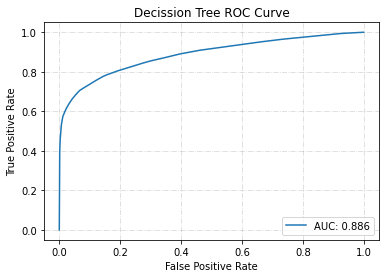

In [10]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
dec_tree3_pred_prob = dec_tree3.predict_proba(X_test)[: , 1]
dec_tree3_FPR, dec_tree3_TPR, thresholds = roc_curve(y_test, dec_tree3_pred_prob)
dec_tree3_AUC = roc_auc_score(y_test, dec_tree3_pred_prob)

plt.plot(dec_tree3_FPR, dec_tree3_TPR, label = "AUC: " + str(round(dec_tree3_AUC, 3)))
plt.title('Decission Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Random Forest** (Train/Test Splits)

In [11]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "RandomForestClassifier", y la aplico sobre "X_train" e "y_train":
rndm_forst3 = RandomForestClassifier()
rndm_forst3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
rndm_forst3_pred = rndm_forst3.predict(X_test)

Wall time: 25min 30s


In [12]:
# Obtengo y almaceno la métrica "Accuracy":
rndm_forst3_ACC = accuracy_score(y_test, rndm_forst3_pred)

# Obtengo y almaceno la métrica "Precission":
rndm_forst3_PREC = precision_score(y_test, rndm_forst3_pred)

# Obtengo y almaceno la métrica "Recall":
rndm_forst3_REC = recall_score(y_test, rndm_forst3_pred)

# Obtengo y almaceno la métrica "F1":
rndm_forst3_F1 = f1_score(y_test, rndm_forst3_pred)

print("Random Forest Metrics:")
print("--------------------------")
print(f"Accuracy: {rndm_forst3_ACC:.3f}")
print(f"Precission: {rndm_forst3_PREC:.3f}")
print(f"Recall: {rndm_forst3_REC:.3f}")
print(f"F1 Score: {rndm_forst3_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, rndm_forst3_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, rndm_forst3_pred))

Random Forest Metrics:
--------------------------
Accuracy: 0.904
Precission: 0.917
Recall: 0.983
F1 Score: 0.948
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.24      0.35     40646
           1       0.92      0.98      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.77      0.61      0.65    385675
weighted avg       0.89      0.90      0.88    385675

--------------------------
Confussion Matrix:
[[  9762  30884]
 [  5980 339049]]


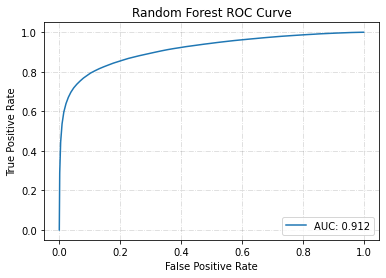

In [13]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
rndm_forst3_pred_prob = rndm_forst3.predict_proba(X_test)[: , 1]
rndm_forst3_FPR, rndm_forst3_TPR, thresholds = roc_curve(y_test, rndm_forst3_pred_prob)
rndm_forst3_AUC = roc_auc_score(y_test, rndm_forst3_pred_prob)

plt.plot(rndm_forst3_FPR, rndm_forst3_TPR, label = "AUC: " + str(round(rndm_forst3_AUC, 3)))
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**XGBoost** (Train/Test Splits)

In [14]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "XGBClassifier", y la aplico sobre "X_train" e "y_train":
xgb_class3 = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_class3.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
xgb_class3_pred = xgb_class3.predict(X_test)

Wall time: 12min 3s


In [15]:
# Obtengo y almaceno la métrica "Accuracy":
xgb_class3_ACC = accuracy_score(y_test, xgb_class3_pred)

# Obtengo y almaceno la métrica "Precission":
xgb_class3_PREC = precision_score(y_test, xgb_class3_pred)

# Obtengo y almaceno la métrica "Recall":
xgb_class3_REC = recall_score(y_test, xgb_class3_pred)

# Obtengo y almaceno la métrica "F1":
xgb_class3_F1 = f1_score(y_test, xgb_class3_pred)

print("XGBoost Metrics:")
print("--------------------------")
print(f"Accuracy: {xgb_class3_ACC:.3f}")
print(f"Precission: {xgb_class3_PREC:.3f}")
print(f"Recall: {xgb_class3_REC:.3f}")
print(f"F1 Score: {xgb_class3_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, xgb_class3_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, xgb_class3_pred))

XGBoost Metrics:
--------------------------
Accuracy: 0.905
Precission: 0.919
Recall: 0.981
F1 Score: 0.949
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.26      0.37     40646
           1       0.92      0.98      0.95    345029

    accuracy                           0.91    385675
   macro avg       0.77      0.62      0.66    385675
weighted avg       0.89      0.91      0.89    385675

--------------------------
Confussion Matrix:
[[ 10771  29875]
 [  6664 338365]]


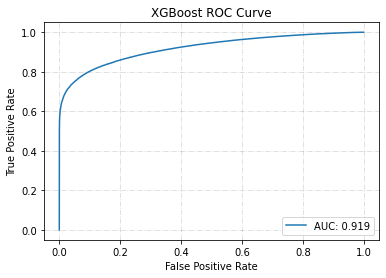

In [16]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
xgb_class3_pred_prob = xgb_class3.predict_proba(X_test)[: , 1]
xgb_class3_FPR, xgb_class3_TPR, thresholds = roc_curve(y_test, xgb_class3_pred_prob)
xgb_class3_AUC = roc_auc_score(y_test, xgb_class3_pred_prob)

plt.plot(xgb_class3_FPR, xgb_class3_TPR, label = "AUC: " + str(round(xgb_class3_AUC, 3)))
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**XGBoost** (Stratified K-Fold)

In [17]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Creo una instancia de "XGBClassifier" (pero no hago "fit"):
xgb_class3b = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Creo una instancia de "StratifiedKFold", especificando que haga 5 splits:
skf = StratifiedKFold(n_splits=5)

# Utilizo la función "cross_validate" para aplicar el modelo (con los splits) y obtener las métricas especificadas como valor del parámetro "scoring"
#   (esto devuelve las métricas, pero no permite hacer predicciones con el objeto, a diferencia de la técnica "train/test"):
xgb_class3b_res = cross_validate(xgb_class3b, X, y, cv=skf, scoring=('accuracy','precision','recall','f1','roc_auc'))

Wall time: 53min 45s


In [23]:
# Las métricas las obtengo directamente del objeto "xgb_class3b_res" (calculando la media con "mean"),
#   pero no he encontrado la forma de obtener "Classification Report" ni "Confussion Matrix":
print("XGBoost Metrics:")
print("--------------------------")
print(f"Accuracy: {xgb_class3b_res['test_accuracy'].mean():.3f}")
print(f"Precission: {xgb_class3b_res['test_precision'].mean():.3f}")
print(f"Recall: {xgb_class3b_res['test_recall'].mean():.3f}")
print(f"F1 Score: {xgb_class3b_res['test_f1'].mean():.3f}")
print(f"AUC: {xgb_class3b_res['test_roc_auc'].mean():.3f}")

XGBoost Metrics:
--------------------------
Accuracy: 0.826
Precission: 0.929
Recall: 0.877
F1 Score: 0.895
AUC: 0.860


**Comparativa de resultados**.  
Compararé cada modelo por separado, para comprobar la diferencia entre los modelos en los que he utilizado la técnica **Train/Test Split** (o **K-Fold**) y los modelos en los que no he hecho splits (pero siempre manteniendo los mismos parámetros).

In [38]:
# Importo el dataframe "clasiff_metrics":
clasiff_metrics = pandas.read_csv('./output/clasiff_metrics.csv')

In [40]:
# Añado los nuevos resultados al dataframe "clasiff_metrics":
clasiff_metrics.loc[len(clasiff_metrics)] = ['LogisticReg_Split', 'Logistic Regression', 'max_iter=1000', round(log_reg3_ACC,3), round(log_reg3_PREC,3), round(log_reg3_REC,3), round(log_reg3_F1,3), round(log_reg3_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['DecissionTree_Split', 'Decission Tree', 'max_depth=5', round(dec_tree3_ACC,3), round(dec_tree3_PREC,3), round(dec_tree3_REC,3), round(dec_tree3_F1,3), round(dec_tree3_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['RandomForest_Split', 'Random Forest', '', round(rndm_forst3_ACC,3), round(rndm_forst3_PREC,3), round(rndm_forst3_REC,3), round(rndm_forst3_F1,3), round(rndm_forst3_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['XGBoost_Split', 'XGBoost', 'use_label_encoder=False | eval_metric=logloss', round(xgb_class3_ACC,3), round(xgb_class3_PREC,3), round(xgb_class3_REC,3), round(xgb_class3_F1,3), round(xgb_class3_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['XGBoost_KFold', 'XGBoost', 'use_label_encoder=False | eval_metric=logloss', round(xgb_class3b_res["test_accuracy"].mean(),3), round(xgb_class3b_res["test_precision"].mean(),3), round(xgb_class3b_res["test_recall"].mean(),3), round(xgb_class3b_res["test_f1"].mean(),3), round(xgb_class3b_res["test_roc_auc"].mean(),3)]

clasiff_metrics

Name                Model  \
0       LogisticReg_Std  Logistic Regression   
1     DecissionTree_Std       Decission Tree   
2      RandomForest_Std        Random Forest   
3           XGBoost_Std              XGBoost   
4       LogisticReg_Mod  Logistic Regression   
5     DecissionTree_Mod       Decission Tree   
6      RandomForest_Mod        Random Forest   
7           XGBoost_Mod              XGBoost   
8     LogisticReg_Split  Logistic Regression   
9   DecissionTree_Split       Decission Tree   
10   RandomForest_Split        Random Forest   
11        XGBoost_Split              XGBoost   
12        XGBoost_KFold              XGBoost   

                                               Params  Accuracy  Precission  \
0                                       max_iter=1000     0.901       0.918   
1                                                 NaN     1.000       1.000   
2                                                 NaN     1.000       1.000   
3       use_label_encoder=False | eval_metric=logloss     0.907       0.920   
4                         max_iter=1000 | solver=saga     0.901       0.918   
5                                         max_depth=5     0.896       0.900   
6                                         max_depth=5     0.894       0.894   
7   use_label_encoder=False | eval_metric=logloss ...     0.798       0.990   
8                                       max_iter=1000     0.901       0.918   
9                                         max_depth=5     0.897       0.901   
10                                                        0.904       0.917   
11      use_label_encoder=False | eval_metric=logloss     0.905       0.919   
12      use_label_encoder=False | eval_metric=logloss     0.826       0.929   

    Recall     F1    AUC  
0    0.977  0.946  0.913  
1    1.000  1.000  1.000  
2    1.000  1.000  1.000  
3    0.982  0.950  0.924  
4    0.977  0.946  0.913  
5    0.994  0.945  0.887  
6    1.000  0.944  0.840  
7    0.782  0.874  0.924  
8    0.977  0.947  0.913  
9    0.994  0.945  0.886  
10   0.983  0.948  0.912  
11   0.981  0.949  0.919  
12   0.877  0.895  0.860

In [48]:
# Utilizo la función "melt" para crear un dataframe con el que poder graficar todas las métricas:
melt_df = clasiff_metrics[['Name','Accuracy','Precission','Recall','F1','AUC']].melt('Name', var_name='Metric')

El modelo **Logistic Regression** obtuvo las mismas métricas con la técnica **Train/Test Split** que sin ella, mejorando incluso una milésima en la métrica **F1**:

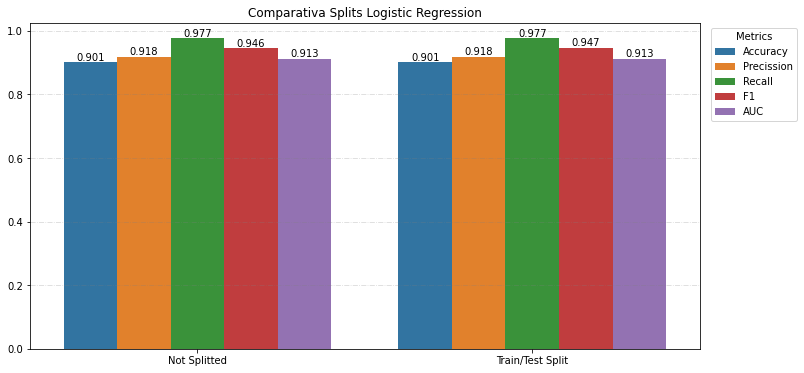

In [101]:
# Creo una gráfica en base al dataframe "melt_df" (seleccionando registros):
plt.figure(figsize=(12, 6))

ax = sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'LogisticReg_Std' or Name == 'LogisticReg_Split'"))

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(title='Metrics', bbox_to_anchor=(1.01, 1))
plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa Splits Logistic Regression")
ax.set_xticklabels(['Not Splitted', 'Train/Test Split'])
plt.xlabel('')
plt.ylabel('')
plt.show()

El modelo **Decission Tree** también se ha quedado casi igual, mejorando una milésima en las métricas **Accuracy** y **Precission**, y emporando una milésima en la métrica **AUC**:

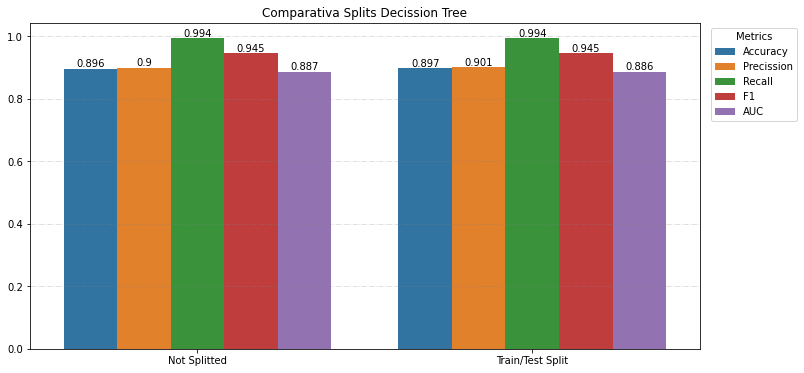

In [103]:
# Creo una gráfica en base al dataframe "melt_df" (seleccionando registros):
plt.figure(figsize=(12, 6))

ax = sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'DecissionTree_Mod' or Name == 'DecissionTree_Split'"))

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(title='Metrics', bbox_to_anchor=(1.01, 1))
plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa Splits Decission Tree")
ax.set_xticklabels(['Not Splitted', 'Train/Test Split'])
plt.xlabel('')
plt.ylabel('')
plt.show()

El modelo **Random Forest** había causado **overfitting** en la prueba equivalente (en la que utilicé los mismos parámetros, pero sin hacer splits), por lo que ha empeorado en todas las métricas, como es natural:

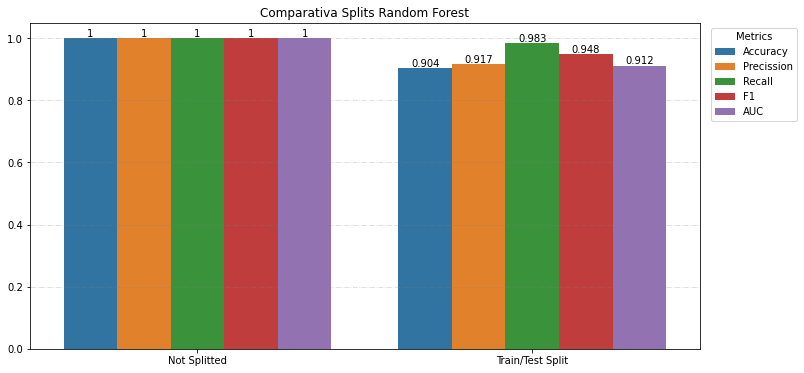

In [105]:
# Creo una gráfica en base al dataframe "melt_df" (seleccionando registros):
plt.figure(figsize=(12, 6))

ax = sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'RandomForest_Std' or Name == 'RandomForest_Split'"))

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(title='Metrics', bbox_to_anchor=(1.01, 1))
plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa Splits Random Forest")
ax.set_xticklabels(['Not Splitted', 'Train/Test Split'])
plt.xlabel('')
plt.ylabel('')
plt.show()

El modelo **XGBoost** tampoco ha cambiado casi sus métricas con la técnica **Train Test Split** (empeorando solo unas milésimas), pero si que ha empeorado bastante con la técnica **Stratified K-Fold Splits**, salvo en la métrica **Precission** (que ha mejorado un poco con respecto a las 2 pruebas anteriores):

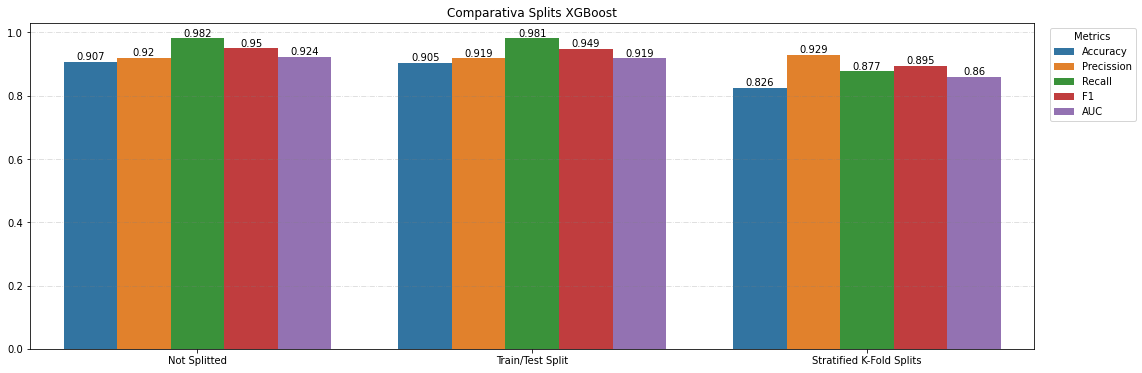

In [107]:
# Creo una gráfica en base al dataframe "melt_df" (seleccionando registros):
plt.figure(figsize=(18, 6))

ax = sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'XGBoost_Std' or Name == 'XGBoost_Split' or Name == 'XGBoost_KFold'"))

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(title='Metrics', bbox_to_anchor=(1.01, 1))
plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Comparativa Splits XGBoost")
ax.set_xticklabels(['Not Splitted', 'Train/Test Split', 'Stratified K-Fold Splits'])
plt.xlabel('')
plt.ylabel('')
plt.show()

In [108]:
# Guardo el dataframe de resultados en un CSV, para poder recuperarlo posteriormente:
clasiff_metrics.to_csv('./output/clasiff_metrics.csv', index=False)

> Como conclusión diría que los resultados por lo general son más fiables cuando se hace algún tipo de split con los datos, y que en principio lo serán más si utilizamos una de las técnicas de **Cross-Validation**, aunque tienen el problema de que multiplican el tiempo de ejecución, y que el objeto que devuelven no permite hacer predicciones (salvo que utilicemos la función **cross_val_predict**, en lugar de **cross_val_score** o **cross_validate**).  
> En el resto de ejercicios utilizaré la técnica **Train/Test Split** en todos los modelos, para que los resultados sean más reales, pero sin invertir tanto tiempo como requieren las técnicas de **Cross-Validation**.

---
## Exercici 5  
Realitza algun procés d’**enginyeria de variables** per millorar-ne la predicció.

In [120]:
# Importo el dataframe "flights_clean" (que en este caso está guardado como "DelayedFlights_clean2.csv":
flights_clean = pandas.read_csv('./output/DelayedFlights_clean2.csv')

flights_clean

CRSDepTime  DepTime  CRSArrTime  CRSElapsedTime  DepDelay  TaxiIn  \
0              1955     2003        2225             150         8       4   
1               735      754        1000             145        19       5   
2               620      628         750              90         8       3   
3              1755     1829        1925              90        34       3   
4              1915     1940        2110             115        25       4   
...             ...      ...         ...             ...       ...     ...   
1928366        1220     1250        1552             152        30       9   
1928367         600      657         749             109        57      15   
1928368         847     1007        1010             143        80       8   
1928369        1240     1251        1437             117        11      13   
1928370        1103     1110        1418             135         7       8   

        UniqueCarrier Origin Dest  Distance  Month  DayofMonth  DayOfWeek  \
0                  WN    IAD  TPA       810      1           3          4   
1                  WN    IAD  TPA       810      1           3          4   
2                  WN    IND  BWI       515      1           3          4   
3                  WN    IND  BWI       515      1           3          4   
4                  WN    IND  JAX       688      1           3          4   
...               ...    ...  ...       ...    ...         ...        ...   
1928366            DL    MSP  ATL       906     12          13          6   
1928367            DL    RIC  ATL       481     12          13          6   
1928368            DL    ATL  IAH       689     12          13          6   
1928369            DL    IAD  ATL       533     12          13          6   
1928370            DL    SAT  ATL       874     12          13          6   

         DelayBool  
0                0  
1                1  
2                1  
3                1  
4                1  
...            ...  
1928366          1  
1928367          1  
1928368          1  
1928369          1  
1928370          0  

[1928371 rows x 14 columns]

**Ingeniería**  
Lo que haré es transformar las columnas **DayOfWeek** y **Month** en categóricas (que en el fondo es lo que son), porque tengo entendido que los modelos de predicción pueden darle más peso a los valores más altos (que en este caso deberían tener el mismo peso), y supongo que eso empeorará las predicciones.

In [121]:
# Almaceno en un diccionario las correspondencias "Numero_Dia : Nombre_Dia":
day_dict = {1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}

# Convierto los valores de la columna 'DayOfWeek' en categóricos, mediante la función "map" y el diccionario "day_dict":
flights_clean['DayOfWeek'] = flights_clean['DayOfWeek'].map(day_dict)

In [122]:
# Almaceno en un diccionario las correspondencias "Numero_Mes : Nombre_Mes":
month_dict = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}

# Convierto los valores de la columna 'Month' en categóricos, mediante la función "map" y el diccionario "month_dict":
flights_clean['Month'] = flights_clean['Month'].map(month_dict)

flights_clean

CRSDepTime  DepTime  CRSArrTime  CRSElapsedTime  DepDelay  TaxiIn  \
0              1955     2003        2225             150         8       4   
1               735      754        1000             145        19       5   
2               620      628         750              90         8       3   
3              1755     1829        1925              90        34       3   
4              1915     1940        2110             115        25       4   
...             ...      ...         ...             ...       ...     ...   
1928366        1220     1250        1552             152        30       9   
1928367         600      657         749             109        57      15   
1928368         847     1007        1010             143        80       8   
1928369        1240     1251        1437             117        11      13   
1928370        1103     1110        1418             135         7       8   

        UniqueCarrier Origin Dest  Distance     Month  DayofMonth DayOfWeek  \
0                  WN    IAD  TPA       810   January           3  Thursday   
1                  WN    IAD  TPA       810   January           3  Thursday   
2                  WN    IND  BWI       515   January           3  Thursday   
3                  WN    IND  BWI       515   January           3  Thursday   
4                  WN    IND  JAX       688   January           3  Thursday   
...               ...    ...  ...       ...       ...         ...       ...   
1928366            DL    MSP  ATL       906  December          13  Saturday   
1928367            DL    RIC  ATL       481  December          13  Saturday   
1928368            DL    ATL  IAH       689  December          13  Saturday   
1928369            DL    IAD  ATL       533  December          13  Saturday   
1928370            DL    SAT  ATL       874  December          13  Saturday   

         DelayBool  
0                0  
1                1  
2                1  
3                1  
4                1  
...            ...  
1928366          1  
1928367          1  
1928368          1  
1928369          1  
1928370          0  

[1928371 rows x 14 columns]

**Transformacion**  
Aquí volveré a escalar las columnas numéricas con **StandardScaler**, y a codificar las columnas categóricas con **get_dummies** (incluídas las nuevas columnas categóricas **DayOfWeek** y **Month**).

In [123]:
# Importo la función "StandardScaler":
from sklearn.preprocessing import StandardScaler

# Almaceno en una lista las columnas con valores numéricos, pero excluyo la columna "DelayBool", que no quiero transformar:
int_cols = ['CRSDepTime','DepTime','CRSArrTime','CRSElapsedTime','DepDelay','TaxiIn','Distance','DayofMonth']

# Uso la función "fit_transform" para escalar las variables almacenadas en "int_cols":
scaled_std = StandardScaler().fit_transform(flights_clean[int_cols])

# Guardo los resultados en un dataframe:
flights_num_std = pandas.DataFrame(scaled_std, columns=int_cols)

# Añado al nuevo dataframe la columna 'DelayBool', sin transformar:
flights_num_std['DelayBool'] = flights_clean['DelayBool']

flights_num_std

CRSDepTime   DepTime  CRSArrTime  CRSElapsedTime  DepDelay    TaxiIn  \
0          1.147281  1.056346    1.249425        0.221839 -0.658801 -0.533668   
1         -1.725146 -1.783886   -1.386213        0.151647 -0.452290 -0.343844   
2         -1.995907 -2.070411   -1.924098       -0.620463 -0.658801 -0.723491   
3          0.676392  0.660669    0.603962       -0.620463 -0.170685 -0.723491   
4          1.053104  0.913084    1.001997       -0.269504 -0.339648 -0.533668   
...             ...       ...         ...             ...       ...       ...   
1928366   -0.583238 -0.655980   -0.198562        0.249916 -0.245780  0.415450   
1928367   -2.042996 -2.004465   -1.926250       -0.353734  0.261110  1.554392   
1928368   -1.461447 -1.208563   -1.364698        0.123570  0.692906  0.225627   
1928369   -0.536149 -0.653706   -0.445990       -0.241427 -0.602480  1.174744   
1928370   -0.858709 -0.974341   -0.486869        0.011263 -0.677575  0.225627   

         Distance  DayofMonth  DelayBool  
0        0.078502   -1.452968          0  
1        0.078502   -1.452968          1  
2       -0.435537   -1.452968          1  
3       -0.435537   -1.452968          1  
4       -0.134084   -1.452968          1  
...           ...         ...        ...  
1928366  0.245783   -0.313570          1  
1928367 -0.494783   -0.313570          1  
1928368 -0.132341   -0.313570          1  
1928369 -0.404172   -0.313570          1  
1928370  0.190023   -0.313570          0  

[1928371 rows x 9 columns]

In [124]:
# Codifico los valores de la columna 'UniqueCarrier':
flights_dumm_carrier = pandas.get_dummies(flights_clean['UniqueCarrier'], prefix='Carrier')

flights_dumm_carrier

Carrier_9E  Carrier_AA  Carrier_AQ  Carrier_AS  Carrier_B6  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Carrier_CO  Carrier_DL  Carrier_EV  Carrier_F9  Carrier_FL  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           1           0           0           0   
1928367           0           1           0           0           0   
1928368           0           1           0           0           0   
1928369           0           1           0           0           0   
1928370           0           1           0           0           0   

         Carrier_HA  Carrier_MQ  Carrier_NW  Carrier_OH  Carrier_OO  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Carrier_UA  Carrier_US  Carrier_WN  Carrier_XE  Carrier_YV  
0                 0           0           1           0           0  
1                 0           0           1           0           0  
2                 0           0           1           0           0  
3                 0           0           1           0           0  
4                 0           0           1           0           0  
...             ...         ...         ...         ...         ...  
1928366           0           0           0           0           0  
1928367           0           0           0           0           0  
1928368           0           0           0           0           0  
1928369           0           0           0           0           0  
1928370           0           0           0           0           0  

[1928371 rows x 20 columns]

In [125]:
# Codifico los valores de la columna 'Origin':
flights_dumm_origin = pandas.get_dummies(flights_clean['Origin'], prefix='Origin')

flights_dumm_origin

Origin_ABE  Origin_ABI  Origin_ABQ  Origin_ABY  Origin_ACK  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Origin_ACT  Origin_ACV  Origin_ACY  Origin_ADK  Origin_ADQ  ...  \
0                 0           0           0           0           0  ...   
1                 0           0           0           0           0  ...   
2                 0           0           0           0           0  ...   
3                 0           0           0           0           0  ...   
4                 0           0           0           0           0  ...   
...             ...         ...         ...         ...         ...  ...   
1928366           0           0           0           0           0  ...   
1928367           0           0           0           0           0  ...   
1928368           0           0           0           0           0  ...   
1928369           0           0           0           0           0  ...   
1928370           0           0           0           0           0  ...   

         Origin_TYR  Origin_TYS  Origin_VLD  Origin_VPS  Origin_WRG  \
0                 0           0           0           0           0   
1                 0           0           0           0           0   
2                 0           0           0           0           0   
3                 0           0           0           0           0   
4                 0           0           0           0           0   
...             ...         ...         ...         ...         ...   
1928366           0           0           0           0           0   
1928367           0           0           0           0           0   
1928368           0           0           0           0           0   
1928369           0           0           0           0           0   
1928370           0           0           0           0           0   

         Origin_WYS  Origin_XNA  Origin_YAK  Origin_YKM  Origin_YUM  
0                 0           0           0           0           0  
1                 0           0           0           0           0  
2                 0           0           0           0           0  
3                 0           0           0           0           0  
4                 0           0           0           0           0  
...             ...         ...         ...         ...         ...  
1928366           0           0           0           0           0  
1928367           0           0           0           0           0  
1928368           0           0           0           0           0  
1928369           0           0           0           0           0  
1928370           0           0           0           0           0  

[1928371 rows x 303 columns]

In [126]:
# Codifico los valores de la columna 'Dest':
flights_dumm_dest = pandas.get_dummies(flights_clean['Dest'], prefix='Dest')

flights_dumm_dest

Dest_ABE  Dest_ABI  Dest_ABQ  Dest_ABY  Dest_ACK  Dest_ACT  Dest_ACV  \
0               0         0         0         0         0         0         0   
1               0         0         0         0         0         0         0   
2               0         0         0         0         0         0         0   
3               0         0         0         0         0         0         0   
4               0         0         0         0         0         0         0   
...           ...       ...       ...       ...       ...       ...       ...   
1928366         0         0         0         0         0         0         0   
1928367         0         0         0         0         0         0         0   
1928368         0         0         0         0         0         0         0   
1928369         0         0         0         0         0         0         0   
1928370         0         0         0         0         0         0         0   

         Dest_ACY  Dest_ADK  Dest_ADQ  ...  Dest_TYR  Dest_TYS  Dest_VLD  \
0               0         0         0  ...         0         0         0   
1               0         0         0  ...         0         0         0   
2               0         0         0  ...         0         0         0   
3               0         0         0  ...         0         0         0   
4               0         0         0  ...         0         0         0   
...           ...       ...       ...  ...       ...       ...       ...   
1928366         0         0         0  ...         0         0         0   
1928367         0         0         0  ...         0         0         0   
1928368         0         0         0  ...         0         0         0   
1928369         0         0         0  ...         0         0         0   
1928370         0         0         0  ...         0         0         0   

         Dest_VPS  Dest_WRG  Dest_WYS  Dest_XNA  Dest_YAK  Dest_YKM  Dest_YUM  
0               0         0         0         0         0         0         0  
1               0         0         0         0         0         0         0  
2               0         0         0         0         0         0         0  
3               0         0         0         0         0         0         0  
4               0         0         0         0         0         0         0  
...           ...       ...       ...       ...       ...       ...       ...  
1928366         0         0         0         0         0         0         0  
1928367         0         0         0         0         0         0         0  
1928368         0         0         0         0         0         0         0  
1928369         0         0         0         0         0         0         0  
1928370         0         0         0         0         0         0         0  

[1928371 rows x 302 columns]

In [128]:
# Codifico los valores de la columna 'Month':
flights_dumm_month = pandas.get_dummies(flights_clean['Month'], prefix='Month')

flights_dumm_month

Month_April  Month_August  Month_December  Month_February  \
0                  0             0               0               0   
1                  0             0               0               0   
2                  0             0               0               0   
3                  0             0               0               0   
4                  0             0               0               0   
...              ...           ...             ...             ...   
1928366            0             0               1               0   
1928367            0             0               1               0   
1928368            0             0               1               0   
1928369            0             0               1               0   
1928370            0             0               1               0   

         Month_January  Month_July  Month_June  Month_March  Month_May  \
0                    1           0           0            0          0   
1                    1           0           0            0          0   
2                    1           0           0            0          0   
3                    1           0           0            0          0   
4                    1           0           0            0          0   
...                ...         ...         ...          ...        ...   
1928366              0           0           0            0          0   
1928367              0           0           0            0          0   
1928368              0           0           0            0          0   
1928369              0           0           0            0          0   
1928370              0           0           0            0          0   

         Month_November  Month_October  Month_September  
0                     0              0                0  
1                     0              0                0  
2                     0              0                0  
3                     0              0                0  
4                     0              0                0  
...                 ...            ...              ...  
1928366               0              0                0  
1928367               0              0                0  
1928368               0              0                0  
1928369               0              0                0  
1928370               0              0                0  

[1928371 rows x 12 columns]

In [129]:
# Codifico los valores de la columna 'DayOfWeek':
flights_dumm_day = pandas.get_dummies(flights_clean['DayOfWeek'], prefix='Day')

flights_dumm_day

Day_Friday  Day_Monday  Day_Saturday  Day_Sunday  Day_Thursday  \
0                 0           0             0           0             1   
1                 0           0             0           0             1   
2                 0           0             0           0             1   
3                 0           0             0           0             1   
4                 0           0             0           0             1   
...             ...         ...           ...         ...           ...   
1928366           0           0             1           0             0   
1928367           0           0             1           0             0   
1928368           0           0             1           0             0   
1928369           0           0             1           0             0   
1928370           0           0             1           0             0   

         Day_Tuesday  Day_Wednesday  
0                  0              0  
1                  0              0  
2                  0              0  
3                  0              0  
4                  0              0  
...              ...            ...  
1928366            0              0  
1928367            0              0  
1928368            0              0  
1928369            0              0  
1928370            0              0  

[1928371 rows x 7 columns]

In [130]:
# Concateno los 6 datqframes, para construir el dataframe sobre el que ejecutaré los modelos de Machine Learning:
flights_scaled_std = pandas.concat([flights_num_std, flights_dumm_carrier, flights_dumm_origin, flights_dumm_dest, flights_dumm_month, flights_dumm_day], axis='columns')

flights_scaled_std

CRSDepTime   DepTime  CRSArrTime  CRSElapsedTime  DepDelay    TaxiIn  \
0          1.147281  1.056346    1.249425        0.221839 -0.658801 -0.533668   
1         -1.725146 -1.783886   -1.386213        0.151647 -0.452290 -0.343844   
2         -1.995907 -2.070411   -1.924098       -0.620463 -0.658801 -0.723491   
3          0.676392  0.660669    0.603962       -0.620463 -0.170685 -0.723491   
4          1.053104  0.913084    1.001997       -0.269504 -0.339648 -0.533668   
...             ...       ...         ...             ...       ...       ...   
1928366   -0.583238 -0.655980   -0.198562        0.249916 -0.245780  0.415450   
1928367   -2.042996 -2.004465   -1.926250       -0.353734  0.261110  1.554392   
1928368   -1.461447 -1.208563   -1.364698        0.123570  0.692906  0.225627   
1928369   -0.536149 -0.653706   -0.445990       -0.241427 -0.602480  1.174744   
1928370   -0.858709 -0.974341   -0.486869        0.011263 -0.677575  0.225627   

         Distance  DayofMonth  DelayBool  Carrier_9E  ...  Month_November  \
0        0.078502   -1.452968          0           0  ...               0   
1        0.078502   -1.452968          1           0  ...               0   
2       -0.435537   -1.452968          1           0  ...               0   
3       -0.435537   -1.452968          1           0  ...               0   
4       -0.134084   -1.452968          1           0  ...               0   
...           ...         ...        ...         ...  ...             ...   
1928366  0.245783   -0.313570          1           0  ...               0   
1928367 -0.494783   -0.313570          1           0  ...               0   
1928368 -0.132341   -0.313570          1           0  ...               0   
1928369 -0.404172   -0.313570          1           0  ...               0   
1928370  0.190023   -0.313570          0           0  ...               0   

         Month_October  Month_September  Day_Friday  Day_Monday  Day_Saturday  \
0                    0                0           0           0             0   
1                    0                0           0           0             0   
2                    0                0           0           0             0   
3                    0                0           0           0             0   
4                    0                0           0           0             0   
...                ...              ...         ...         ...           ...   
1928366              0                0           0           0             1   
1928367              0                0           0           0             1   
1928368              0                0           0           0             1   
1928369              0                0           0           0             1   
1928370              0                0           0           0             1   

         Day_Sunday  Day_Thursday  Day_Tuesday  Day_Wednesday  
0                 0             1            0              0  
1                 0             1            0              0  
2                 0             1            0              0  
3                 0             1            0              0  
4                 0             1            0              0  
...             ...           ...          ...            ...  
1928366           0             0            0              0  
1928367           0             0            0              0  
1928368           0             0            0              0  
1928369           0             0            0              0  
1928370           0             0            0              0  

[1928371 rows x 653 columns]

In [131]:
# Guardo el nuevo dataframe en un CSV (esta vez con nombre "DelayedFlights_scaled_std3.csv"), para poder hacer diferentes pruebas a partir de este punto con más facilidad:
flights_scaled_std.to_csv('./output/DelayedFlights_scaled_std3.csv', index=False)

---

Pruebas con los modelos

In [5]:
# Importo las librerías que utilizaré en el ejercicio:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [6]:
# Importo el dataframe "flights_scaled_std" (que en este caso está guardado como "DelayedFlights_scaled_std3.csv"):
flights_scaled_std = pandas.read_csv('./output/DelayedFlights_scaled_std3.csv')

**Logistic Regression**  
NOTA: Tuve que aumentar el valor del parámetro **max_iter** a **1200** (estaba a **1000**), porque volvió a dar error de falta de convergencia por haber llegado al limite de iteraciones (supongo que como consecuencia de la creación de nuevas columnas dummies).

In [10]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "LogisticRegression", y la aplico sobre "X_train" e "y_train":
log_reg4 = LogisticRegression(max_iter=1200)
log_reg4.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
log_reg4_pred = log_reg4.predict(X_test)

Wall time: 17min 49s


In [11]:
# Obtengo y almaceno la métrica "Accuracy":
log_reg4_ACC = accuracy_score(y_test, log_reg4_pred)

# Obtengo y almaceno la métrica "Precission":
log_reg4_PREC = precision_score(y_test, log_reg4_pred)

# Obtengo y almaceno la métrica "Recall":
log_reg4_REC = recall_score(y_test, log_reg4_pred)

# Obtengo y almaceno la métrica "F1":
log_reg4_F1 = f1_score(y_test, log_reg4_pred)

print("Logistic Regression Metrics:")
print("--------------------------")
print(f"Accuracy: {log_reg4_ACC:.3f}")
print(f"Precission: {log_reg4_PREC:.3f}")
print(f"Recall: {log_reg4_REC:.3f}")
print(f"F1 Score: {log_reg4_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, log_reg4_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, log_reg4_pred))

Logistic Regression Metrics:
--------------------------
Accuracy: 0.902
Precission: 0.918
Recall: 0.977
F1 Score: 0.947
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.26      0.36     40646
           1       0.92      0.98      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.74      0.62      0.65    385675
weighted avg       0.88      0.90      0.88    385675

--------------------------
Confussion Matrix:
[[ 10638  30008]
 [  7972 337057]]


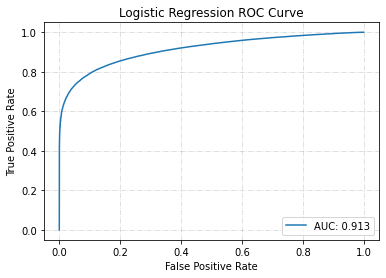

In [12]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
log_reg4_pred_prob = log_reg4.predict_proba(X_test)[: , 1]
log_reg4_FPR, log_reg4_TPR, thresholds = roc_curve(y_test, log_reg4_pred_prob)
log_reg4_AUC = roc_auc_score(y_test, log_reg4_pred_prob)

plt.plot(log_reg4_FPR, log_reg4_TPR, label = "AUC: " + str(round(log_reg4_AUC, 3)))
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Decission Tree**

In [13]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "DecisionTreeClassifier", y la aplico sobre "X_train" e "y_train":
dec_tree4 = DecisionTreeClassifier(max_depth=5)
dec_tree4.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
dec_tree4_pred = dec_tree4.predict(X_test)

Wall time: 2min 20s


In [14]:
# Obtengo y almaceno la métrica "Accuracy":
dec_tree4_ACC = accuracy_score(y_test, dec_tree4_pred)

# Obtengo y almaceno la métrica "Precission":
dec_tree4_PREC = precision_score(y_test, dec_tree4_pred)

# Obtengo y almaceno la métrica "Recall":
dec_tree4_REC = recall_score(y_test, dec_tree4_pred)

# Obtengo y almaceno la métrica "F1":
dec_tree4_F1 = f1_score(y_test, dec_tree4_pred)

print("Decission Tree Metrics:")
print("--------------------------")
print(f"Accuracy: {dec_tree4_ACC:.3f}")
print(f"Precission: {dec_tree4_PREC:.3f}")
print(f"Recall: {dec_tree4_REC:.3f}")
print(f"F1 Score: {dec_tree4_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, dec_tree4_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, dec_tree4_pred))

Decission Tree Metrics:
--------------------------
Accuracy: 0.897
Precission: 0.901
Recall: 0.994
F1 Score: 0.945
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.07      0.13     40646
           1       0.90      0.99      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.74      0.53      0.54    385675
weighted avg       0.87      0.90      0.86    385675

--------------------------
Confussion Matrix:
[[  3036  37610]
 [  2182 342847]]


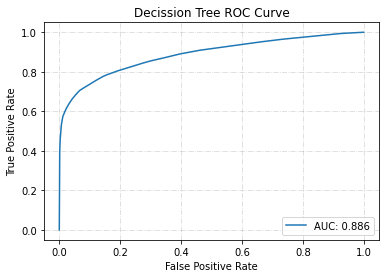

In [15]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
dec_tree4_pred_prob = dec_tree4.predict_proba(X_test)[: , 1]
dec_tree4_FPR, dec_tree4_TPR, thresholds = roc_curve(y_test, dec_tree4_pred_prob)
dec_tree4_AUC = roc_auc_score(y_test, dec_tree4_pred_prob)

plt.plot(dec_tree4_FPR, dec_tree4_TPR, label = "AUC: " + str(round(dec_tree4_AUC, 3)))
plt.title('Decission Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Random Forest**

In [16]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "RandomForestClassifier", y la aplico sobre "X_train" e "y_train":
rndm_forst4 = RandomForestClassifier()
rndm_forst4.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
rndm_forst4_pred = rndm_forst4.predict(X_test)

Wall time: 26min 21s


In [17]:
# Obtengo y almaceno la métrica "Accuracy":
rndm_forst4_ACC = accuracy_score(y_test, rndm_forst4_pred)

# Obtengo y almaceno la métrica "Precission":
rndm_forst4_PREC = precision_score(y_test, rndm_forst4_pred)

# Obtengo y almaceno la métrica "Recall":
rndm_forst4_REC = recall_score(y_test, rndm_forst4_pred)

# Obtengo y almaceno la métrica "F1":
rndm_forst4_F1 = f1_score(y_test, rndm_forst4_pred)

print("Random Forest Metrics:")
print("--------------------------")
print(f"Accuracy: {rndm_forst4_ACC:.3f}")
print(f"Precission: {rndm_forst4_PREC:.3f}")
print(f"Recall: {rndm_forst4_REC:.3f}")
print(f"F1 Score: {rndm_forst4_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, rndm_forst4_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, rndm_forst4_pred))

Random Forest Metrics:
--------------------------
Accuracy: 0.904
Precission: 0.913
Recall: 0.988
F1 Score: 0.949
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.20      0.30     40646
           1       0.91      0.99      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.78      0.59      0.63    385675
weighted avg       0.89      0.90      0.88    385675

--------------------------
Confussion Matrix:
[[  8032  32614]
 [  4294 340735]]


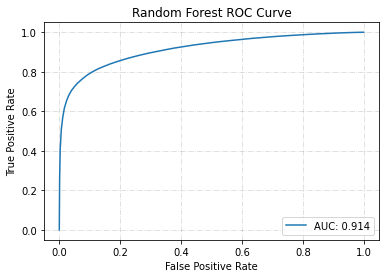

In [18]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
rndm_forst4_pred_prob = rndm_forst4.predict_proba(X_test)[: , 1]
rndm_forst4_FPR, rndm_forst4_TPR, thresholds = roc_curve(y_test, rndm_forst4_pred_prob)
rndm_forst4_AUC = roc_auc_score(y_test, rndm_forst4_pred_prob)

plt.plot(rndm_forst4_FPR, rndm_forst4_TPR, label = "AUC: " + str(round(rndm_forst4_AUC, 3)))
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**XGBoost**

In [19]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool'):
X = flights_scaled_std.drop('DelayBool', axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "XGBClassifier", y la aplico sobre "X_train" e "y_train":
xgb_class4 = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_class4.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
xgb_class4_pred = xgb_class4.predict(X_test)

Wall time: 12min 25s


In [20]:
# Obtengo y almaceno la métrica "Accuracy":
xgb_class4_ACC = accuracy_score(y_test, xgb_class4_pred)

# Obtengo y almaceno la métrica "Precission":
xgb_class4_PREC = precision_score(y_test, xgb_class4_pred)

# Obtengo y almaceno la métrica "Recall":
xgb_class4_REC = recall_score(y_test, xgb_class4_pred)

# Obtengo y almaceno la métrica "F1":
xgb_class4_F1 = f1_score(y_test, xgb_class4_pred)

print("XGBoost Metrics:")
print("--------------------------")
print(f"Accuracy: {xgb_class4_ACC:.3f}")
print(f"Precission: {xgb_class4_PREC:.3f}")
print(f"Recall: {xgb_class4_REC:.3f}")
print(f"F1 Score: {xgb_class4_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, xgb_class4_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, xgb_class4_pred))

XGBoost Metrics:
--------------------------
Accuracy: 0.905
Precission: 0.919
Recall: 0.981
F1 Score: 0.949
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.26      0.37     40646
           1       0.92      0.98      0.95    345029

    accuracy                           0.91    385675
   macro avg       0.77      0.62      0.66    385675
weighted avg       0.89      0.91      0.89    385675

--------------------------
Confussion Matrix:
[[ 10700  29946]
 [  6629 338400]]


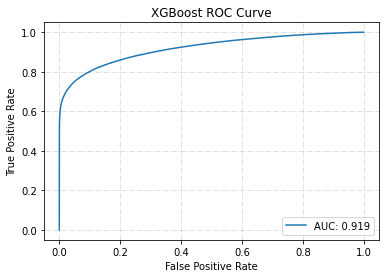

In [21]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
xgb_class4_pred_prob = xgb_class4.predict_proba(X_test)[: , 1]
xgb_class4_FPR, xgb_class4_TPR, thresholds = roc_curve(y_test, xgb_class4_pred_prob)
xgb_class4_AUC = roc_auc_score(y_test, xgb_class4_pred_prob)

plt.plot(xgb_class4_FPR, xgb_class4_TPR, label = "AUC: " + str(round(xgb_class4_AUC, 3)))
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Comparativa de resultados**

In [22]:
# Importo el dataframe "clasiff_metrics":
clasiff_metrics = pandas.read_csv('./output/clasiff_metrics.csv')

In [23]:
# Añado los nuevos resultados al dataframe "clasiff_metrics":
clasiff_metrics.loc[len(clasiff_metrics)] = ['LogisticReg_Eng', 'Logistic Regression', 'max_iter=1200', round(log_reg4_ACC,3), round(log_reg4_PREC,3), round(log_reg4_REC,3), round(log_reg4_F1,3), round(log_reg4_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['DecissionTree_Eng', 'Decission Tree', 'max_depth=5', round(dec_tree4_ACC,3), round(dec_tree4_PREC,3), round(dec_tree4_REC,3), round(dec_tree4_F1,3), round(dec_tree4_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['RandomForest_Eng', 'Random Forest', '', round(rndm_forst4_ACC,3), round(rndm_forst4_PREC,3), round(rndm_forst4_REC,3), round(rndm_forst4_F1,3), round(rndm_forst4_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['XGBoost_Eng', 'XGBoost', 'use_label_encoder=False | eval_metric=logloss', round(xgb_class4_ACC,3), round(xgb_class4_PREC,3), round(xgb_class4_REC,3), round(xgb_class4_F1,3), round(xgb_class4_AUC,3)]

clasiff_metrics

Name                Model  \
0       LogisticReg_Std  Logistic Regression   
1     DecissionTree_Std       Decission Tree   
2      RandomForest_Std        Random Forest   
3           XGBoost_Std              XGBoost   
4       LogisticReg_Mod  Logistic Regression   
5     DecissionTree_Mod       Decission Tree   
6      RandomForest_Mod        Random Forest   
7           XGBoost_Mod              XGBoost   
8     LogisticReg_Split  Logistic Regression   
9   DecissionTree_Split       Decission Tree   
10   RandomForest_Split        Random Forest   
11        XGBoost_Split              XGBoost   
12        XGBoost_KFold              XGBoost   
13      LogisticReg_Eng  Logistic Regression   
14    DecissionTree_Eng       Decission Tree   
15     RandomForest_Eng        Random Forest   
16          XGBoost_Eng              XGBoost   

                                               Params  Accuracy  Precission  \
0                                       max_iter=1000     0.901       0.918   
1                                                 NaN     1.000       1.000   
2                                                 NaN     1.000       1.000   
3       use_label_encoder=False | eval_metric=logloss     0.907       0.920   
4                         max_iter=1000 | solver=saga     0.901       0.918   
5                                         max_depth=5     0.896       0.900   
6                                         max_depth=5     0.894       0.894   
7   use_label_encoder=False | eval_metric=logloss ...     0.798       0.990   
8                                       max_iter=1000     0.901       0.918   
9                                         max_depth=5     0.897       0.901   
10                                                NaN     0.904       0.917   
11      use_label_encoder=False | eval_metric=logloss     0.905       0.919   
12      use_label_encoder=False | eval_metric=logloss     0.826       0.929   
13                                      max_iter=1200     0.902       0.918   
14                                        max_depth=5     0.897       0.901   
15                                                        0.904       0.913   
16      use_label_encoder=False | eval_metric=logloss     0.905       0.919   

    Recall     F1    AUC  
0    0.977  0.946  0.913  
1    1.000  1.000  1.000  
2    1.000  1.000  1.000  
3    0.982  0.950  0.924  
4    0.977  0.946  0.913  
5    0.994  0.945  0.887  
6    1.000  0.944  0.840  
7    0.782  0.874  0.924  
8    0.977  0.947  0.913  
9    0.994  0.945  0.886  
10   0.983  0.948  0.912  
11   0.981  0.949  0.919  
12   0.877  0.895  0.860  
13   0.977  0.947  0.913  
14   0.994  0.945  0.886  
15   0.988  0.949  0.914  
16   0.981  0.949  0.919

In [24]:
# Utilizo la función "melt" para crear un dataframe con el que poder graficar todas las métricas:
melt_df = clasiff_metrics[['Name','Accuracy','Precission','Recall','F1','AUC']].melt('Name', var_name='Metric')

Creo un conjunto de **subplots** para comparar los resultados, poniendo como referencia las pruebas equivalentes, en las que también utilicé la técnica **Train/Test Splits**:

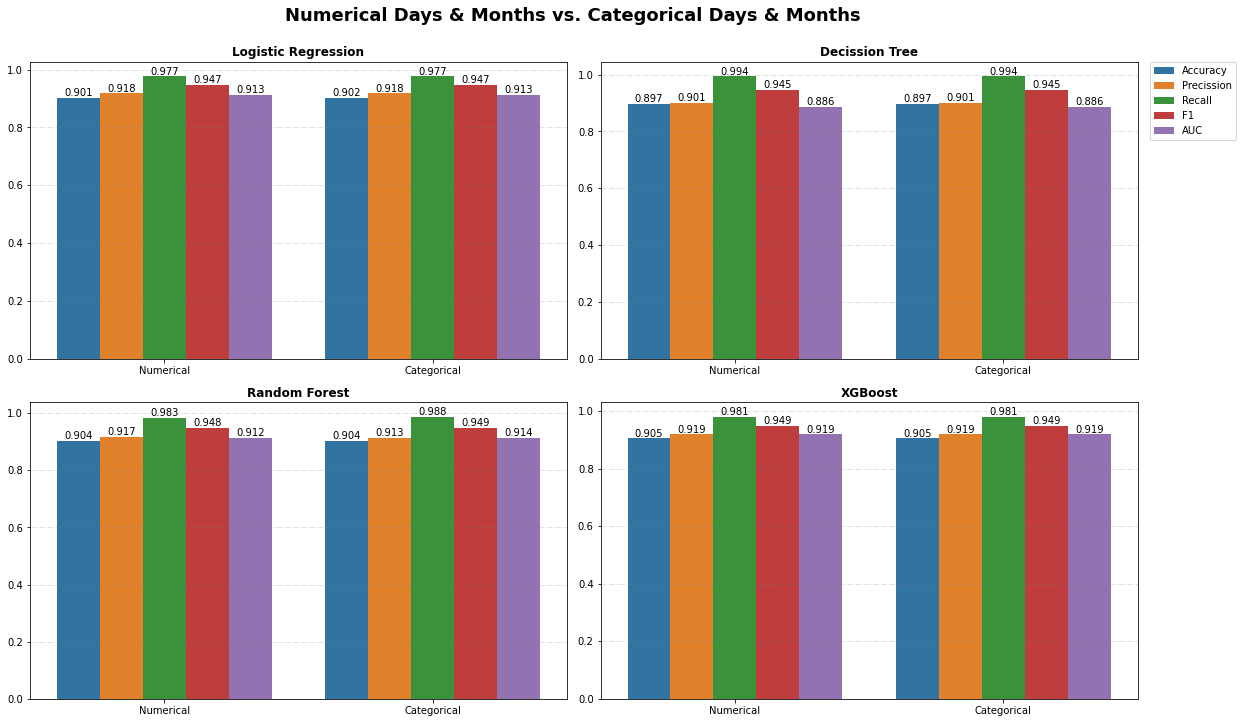

In [29]:
# Especifico la figura y los subplots:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Creo las 4 gráficas, seleccionando registros del dataframe "melt_df":
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'LogisticReg_Split' or Name == 'LogisticReg_Eng'"), ax=ax1)
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'DecissionTree_Split' or Name == 'DecissionTree_Eng'"), ax=ax2)
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'RandomForest_Split' or Name == 'RandomForest_Eng'"), ax=ax3)
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'XGBoost_Split' or Name == 'XGBoost_Eng'"), ax=ax4)

# Muestro los valores de las métricas:
for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)
for container in ax3.containers:
    ax3.bar_label(container)
for container in ax4.containers:
    ax4.bar_label(container)

# Muestro los "grids":
ax1.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
ax2.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
ax3.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
ax4.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)

# Muestro una leyenda general, y oculto las leyendas de cada subplot
#   (en la primera línea hay que especificar un "ax", para que pille la leyenda):
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.08, 0.93))
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

# Especifico los títulos de cada subplot:
ax1.set_title('Logistic Regression', fontweight='bold')
ax2.set_title('Decission Tree', fontweight='bold')
ax3.set_title('Random Forest', fontweight='bold')
ax4.set_title('XGBoost', fontweight='bold')

# Oculto los labels de cada subplot:
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax4.set_xlabel('')
ax4.set_ylabel('')

# Especifico los xticklabels de cada subplot:
ax1.set_xticklabels(['Numerical', 'Categorical'])
ax2.set_xticklabels(['Numerical', 'Categorical'])
ax3.set_xticklabels(['Numerical', 'Categorical'])
ax4.set_xticklabels(['Numerical', 'Categorical'])

# Especifico el título general:
plt.suptitle("Numerical Days & Months vs. Categorical Days & Months", fontsize=18, fontweight='bold', verticalalignment='baseline')

plt.tight_layout();

> Pues no hemos avanzado mucho, la verdad, pero algo es algo.  
> Los modelos **Decission Tree** y **XGBoost** se quedaron exactamente igual, no variando sus métricas ni una milésima.  
> El modelo **Logistic Regression** solo mejoró una milésima en la métrica **Accuracy**, y el modelo **Random Forest** es el único que produjo cambios más evidentes. Mejoró un poco en las métricas **Recall**, **F1** y **AUC**, y empeoró un poco en la métrica **Precission** (pero en este ejercicio las métricas en las que mejoró nos interesan más).  
> En general, podríamos decir que el resultado de la "ingeniería de variables" fue positivo, aunque menos determinante de lo esperado.

In [30]:
# Guardo el dataframe de resultados en un CSV, para poder recuperarlo posteriormente:
clasiff_metrics.to_csv('./output/clasiff_metrics.csv', index=False)

---
## Exercici 6  
No utilitzis la variable **DepDelay** a l’hora de fer prediccions.

**Logistic Regression**

In [32]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool' y 'DepDelay'):
X = flights_scaled_std.drop(['DelayBool','DepDelay'], axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "LogisticRegression", y la aplico sobre "X_train" e "y_train":
log_reg5 = LogisticRegression(max_iter=1200)
log_reg5.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
log_reg5_pred = log_reg5.predict(X_test)

Wall time: 17min 4s


In [33]:
# Obtengo y almaceno la métrica "Accuracy":
log_reg5_ACC = accuracy_score(y_test, log_reg5_pred)

# Obtengo y almaceno la métrica "Precission":
log_reg5_PREC = precision_score(y_test, log_reg5_pred)

# Obtengo y almaceno la métrica "Recall":
log_reg5_REC = recall_score(y_test, log_reg5_pred)

# Obtengo y almaceno la métrica "F1":
log_reg5_F1 = f1_score(y_test, log_reg5_pred)

print("Logistic Regression Metrics:")
print("--------------------------")
print(f"Accuracy: {log_reg5_ACC:.3f}")
print(f"Precission: {log_reg5_PREC:.3f}")
print(f"Recall: {log_reg5_REC:.3f}")
print(f"F1 Score: {log_reg5_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, log_reg5_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, log_reg5_pred))

Logistic Regression Metrics:
--------------------------
Accuracy: 0.898
Precission: 0.906
Recall: 0.988
F1 Score: 0.945
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.14      0.22     40646
           1       0.91      0.99      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.73      0.56      0.58    385675
weighted avg       0.87      0.90      0.87    385675

--------------------------
Confussion Matrix:
[[  5495  35151]
 [  4310 340719]]


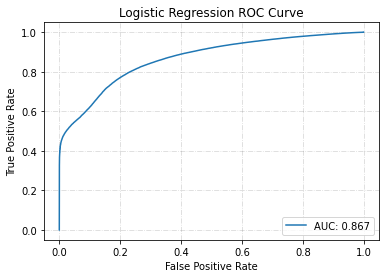

In [34]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
log_reg5_pred_prob = log_reg5.predict_proba(X_test)[: , 1]
log_reg5_FPR, log_reg5_TPR, thresholds = roc_curve(y_test, log_reg5_pred_prob)
log_reg5_AUC = roc_auc_score(y_test, log_reg5_pred_prob)

plt.plot(log_reg5_FPR, log_reg5_TPR, label = "AUC: " + str(round(log_reg5_AUC, 3)))
plt.title('Logistic Regression ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Decission Tree**

In [35]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool' y 'DepDelay'):
X = flights_scaled_std.drop(['DelayBool','DepDelay'], axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "DecisionTreeClassifier", y la aplico sobre "X_train" e "y_train":
dec_tree5 = DecisionTreeClassifier(max_depth=5)
dec_tree5.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
dec_tree5_pred = dec_tree5.predict(X_test)

Wall time: 2min 8s


In [36]:
# Obtengo y almaceno la métrica "Accuracy":
dec_tree5_ACC = accuracy_score(y_test, dec_tree5_pred)

# Obtengo y almaceno la métrica "Precission":
dec_tree5_PREC = precision_score(y_test, dec_tree5_pred)

# Obtengo y almaceno la métrica "Recall":
dec_tree5_REC = recall_score(y_test, dec_tree5_pred)

# Obtengo y almaceno la métrica "F1":
dec_tree5_F1 = f1_score(y_test, dec_tree5_pred)

print("Decission Tree Metrics:")
print("--------------------------")
print(f"Accuracy: {dec_tree5_ACC:.3f}")
print(f"Precission: {dec_tree5_PREC:.3f}")
print(f"Recall: {dec_tree5_REC:.3f}")
print(f"F1 Score: {dec_tree5_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, dec_tree5_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, dec_tree5_pred))

Decission Tree Metrics:
--------------------------
Accuracy: 0.895
Precission: 0.895
Recall: 1.000
F1 Score: 0.944
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.00      0.00     40646
           1       0.89      1.00      0.94    345029

    accuracy                           0.89    385675
   macro avg       0.82      0.50      0.47    385675
weighted avg       0.88      0.89      0.85    385675

--------------------------
Confussion Matrix:
[[    67  40579]
 [    24 345005]]


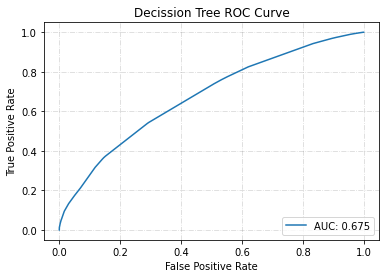

In [37]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
dec_tree5_pred_prob = dec_tree5.predict_proba(X_test)[: , 1]
dec_tree5_FPR, dec_tree5_TPR, thresholds = roc_curve(y_test, dec_tree5_pred_prob)
dec_tree5_AUC = roc_auc_score(y_test, dec_tree5_pred_prob)

plt.plot(dec_tree5_FPR, dec_tree5_TPR, label = "AUC: " + str(round(dec_tree5_AUC, 3)))
plt.title('Decission Tree ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Random Forest**

In [38]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool' y 'DepDelay'):
X = flights_scaled_std.drop(['DelayBool','DepDelay'], axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "RandomForestClassifier", y la aplico sobre "X_train" e "y_train":
rndm_forst5 = RandomForestClassifier()
rndm_forst5.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
rndm_forst5_pred = rndm_forst5.predict(X_test)

Wall time: 28min 3s


In [39]:
# Obtengo y almaceno la métrica "Accuracy":
rndm_forst5_ACC = accuracy_score(y_test, rndm_forst5_pred)

# Obtengo y almaceno la métrica "Precission":
rndm_forst5_PREC = precision_score(y_test, rndm_forst5_pred)

# Obtengo y almaceno la métrica "Recall":
rndm_forst5_REC = recall_score(y_test, rndm_forst5_pred)

# Obtengo y almaceno la métrica "F1":
rndm_forst5_F1 = f1_score(y_test, rndm_forst5_pred)

print("Random Forest Metrics:")
print("--------------------------")
print(f"Accuracy: {rndm_forst5_ACC:.3f}")
print(f"Precission: {rndm_forst5_PREC:.3f}")
print(f"Recall: {rndm_forst5_REC:.3f}")
print(f"F1 Score: {rndm_forst5_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, rndm_forst5_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, rndm_forst5_pred))

Random Forest Metrics:
--------------------------
Accuracy: 0.896
Precission: 0.901
Recall: 0.994
F1 Score: 0.945
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.07      0.12     40646
           1       0.90      0.99      0.94    345029

    accuracy                           0.90    385675
   macro avg       0.73      0.53      0.53    385675
weighted avg       0.87      0.90      0.86    385675

--------------------------
Confussion Matrix:
[[  2760  37886]
 [  2130 342899]]


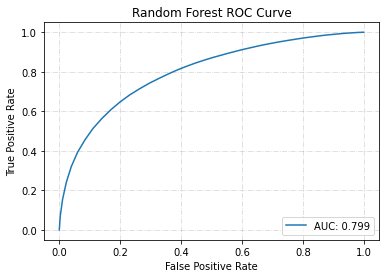

In [40]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
rndm_forst5_pred_prob = rndm_forst5.predict_proba(X_test)[: , 1]
rndm_forst5_FPR, rndm_forst5_TPR, thresholds = roc_curve(y_test, rndm_forst5_pred_prob)
rndm_forst5_AUC = roc_auc_score(y_test, rndm_forst5_pred_prob)

plt.plot(rndm_forst5_FPR, rndm_forst5_TPR, label = "AUC: " + str(round(rndm_forst5_AUC, 3)))
plt.title('Random Forest ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**XGBoost**

In [41]:
%%time
# Defino las variables independientes (todas las columnas de "flights_scaled_std", menos 'DelayBool' y 'DepDelay'):
X = flights_scaled_std.drop(['DelayBool','DepDelay'], axis=1)

# Defino la variable dependiente (solo 'DelayBool'):
y = flights_scaled_std['DelayBool']

# Separo las partes de entrenamiento y de testeo, con la función "train_test_split":
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creo una instancia de "XGBClassifier", y la aplico sobre "X_train" e "y_train":
xgb_class5 = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_class5.fit(X_train, y_train)

# Utilizo la función "predict" para hacer predicciones con el modelo:
xgb_class5_pred = xgb_class5.predict(X_test)

Wall time: 14min


In [42]:
# Obtengo y almaceno la métrica "Accuracy":
xgb_class5_ACC = accuracy_score(y_test, xgb_class5_pred)

# Obtengo y almaceno la métrica "Precission":
xgb_class5_PREC = precision_score(y_test, xgb_class5_pred)

# Obtengo y almaceno la métrica "Recall":
xgb_class5_REC = recall_score(y_test, xgb_class5_pred)

# Obtengo y almaceno la métrica "F1":
xgb_class5_F1 = f1_score(y_test, xgb_class5_pred)

print("XGBoost Metrics:")
print("--------------------------")
print(f"Accuracy: {xgb_class5_ACC:.3f}")
print(f"Precission: {xgb_class5_PREC:.3f}")
print(f"Recall: {xgb_class5_REC:.3f}")
print(f"F1 Score: {xgb_class5_F1:.3f}")
print("--------------------------")
print("Classification Report:")
print(classification_report(y_test, xgb_class5_pred))
print("--------------------------")
print("Confussion Matrix:")
print(confusion_matrix(y_test, xgb_class5_pred))

XGBoost Metrics:
--------------------------
Accuracy: 0.900
Precission: 0.905
Recall: 0.992
F1 Score: 0.947
--------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.12      0.20     40646
           1       0.91      0.99      0.95    345029

    accuracy                           0.90    385675
   macro avg       0.78      0.56      0.57    385675
weighted avg       0.88      0.90      0.87    385675

--------------------------
Confussion Matrix:
[[  4796  35850]
 [  2598 342431]]


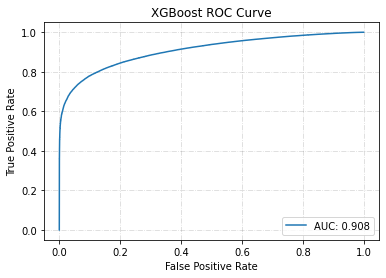

In [43]:
# Obtengo la curva "ROC" y la métrica "AUC", y las muestro en una gráfica:
xgb_class5_pred_prob = xgb_class5.predict_proba(X_test)[: , 1]
xgb_class5_FPR, xgb_class5_TPR, thresholds = roc_curve(y_test, xgb_class5_pred_prob)
xgb_class5_AUC = roc_auc_score(y_test, xgb_class5_pred_prob)

plt.plot(xgb_class5_FPR, xgb_class5_TPR, label = "AUC: " + str(round(xgb_class5_AUC, 3)))
plt.title('XGBoost ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(color='gray', linestyle='dashdot', alpha=0.3)

**Comparativa de resultados**

In [44]:
# Importo el dataframe "clasiff_metrics":
clasiff_metrics = pandas.read_csv('./output/clasiff_metrics.csv')

In [45]:
# Añado los nuevos resultados al dataframe "clasiff_metrics":
clasiff_metrics.loc[len(clasiff_metrics)] = ['LogisticReg_Trunc', 'Logistic Regression', 'max_iter=1200', round(log_reg5_ACC,3), round(log_reg5_PREC,3), round(log_reg5_REC,3), round(log_reg5_F1,3), round(log_reg5_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['DecissionTree_Trunc', 'Decission Tree', 'max_depth=5', round(dec_tree5_ACC,3), round(dec_tree5_PREC,3), round(dec_tree5_REC,3), round(dec_tree5_F1,3), round(dec_tree5_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['RandomForest_Trunc', 'Random Forest', '', round(rndm_forst5_ACC,3), round(rndm_forst5_PREC,3), round(rndm_forst5_REC,3), round(rndm_forst5_F1,3), round(rndm_forst5_AUC,3)]
clasiff_metrics.loc[len(clasiff_metrics)] = ['XGBoost_Trunc', 'XGBoost', 'use_label_encoder=False | eval_metric=logloss', round(xgb_class5_ACC,3), round(xgb_class5_PREC,3), round(xgb_class5_REC,3), round(xgb_class5_F1,3), round(xgb_class5_AUC,3)]

clasiff_metrics

Name                Model  \
0       LogisticReg_Std  Logistic Regression   
1     DecissionTree_Std       Decission Tree   
2      RandomForest_Std        Random Forest   
3           XGBoost_Std              XGBoost   
4       LogisticReg_Mod  Logistic Regression   
5     DecissionTree_Mod       Decission Tree   
6      RandomForest_Mod        Random Forest   
7           XGBoost_Mod              XGBoost   
8     LogisticReg_Split  Logistic Regression   
9   DecissionTree_Split       Decission Tree   
10   RandomForest_Split        Random Forest   
11        XGBoost_Split              XGBoost   
12        XGBoost_KFold              XGBoost   
13      LogisticReg_Eng  Logistic Regression   
14    DecissionTree_Eng       Decission Tree   
15     RandomForest_Eng        Random Forest   
16          XGBoost_Eng              XGBoost   
17    LogisticReg_Trunc  Logistic Regression   
18  DecissionTree_Trunc       Decission Tree   
19   RandomForest_Trunc        Random Forest   
20        XGBoost_Trunc              XGBoost   

                                               Params  Accuracy  Precission  \
0                                       max_iter=1000     0.901       0.918   
1                                                 NaN     1.000       1.000   
2                                                 NaN     1.000       1.000   
3       use_label_encoder=False | eval_metric=logloss     0.907       0.920   
4                         max_iter=1000 | solver=saga     0.901       0.918   
5                                         max_depth=5     0.896       0.900   
6                                         max_depth=5     0.894       0.894   
7   use_label_encoder=False | eval_metric=logloss ...     0.798       0.990   
8                                       max_iter=1000     0.901       0.918   
9                                         max_depth=5     0.897       0.901   
10                                                NaN     0.904       0.917   
11      use_label_encoder=False | eval_metric=logloss     0.905       0.919   
12      use_label_encoder=False | eval_metric=logloss     0.826       0.929   
13                                      max_iter=1200     0.902       0.918   
14                                        max_depth=5     0.897       0.901   
15                                                NaN     0.904       0.913   
16      use_label_encoder=False | eval_metric=logloss     0.905       0.919   
17                                      max_iter=1200     0.898       0.906   
18                                        max_depth=5     0.895       0.895   
19                                                        0.896       0.901   
20      use_label_encoder=False | eval_metric=logloss     0.900       0.905   

    Recall     F1    AUC  
0    0.977  0.946  0.913  
1    1.000  1.000  1.000  
2    1.000  1.000  1.000  
3    0.982  0.950  0.924  
4    0.977  0.946  0.913  
5    0.994  0.945  0.887  
6    1.000  0.944  0.840  
7    0.782  0.874  0.924  
8    0.977  0.947  0.913  
9    0.994  0.945  0.886  
10   0.983  0.948  0.912  
11   0.981  0.949  0.919  
12   0.877  0.895  0.860  
13   0.977  0.947  0.913  
14   0.994  0.945  0.886  
15   0.988  0.949  0.914  
16   0.981  0.949  0.919  
17   0.988  0.945  0.867  
18   1.000  0.944  0.675  
19   0.994  0.945  0.799  
20   0.992  0.947  0.908

In [46]:
# Utilizo la función "melt" para crear un dataframe con el que poder graficar todas las métricas:
melt_df = clasiff_metrics[['Name','Accuracy','Precission','Recall','F1','AUC']].melt('Name', var_name='Metric')

Creo un conjunto de **subplots** para comparar los resultados, poniendo como referencia las pruebas equivalentes, en las que también utilicé la técnica **Train/Test Splits**, y la **ingeniería de variables**:

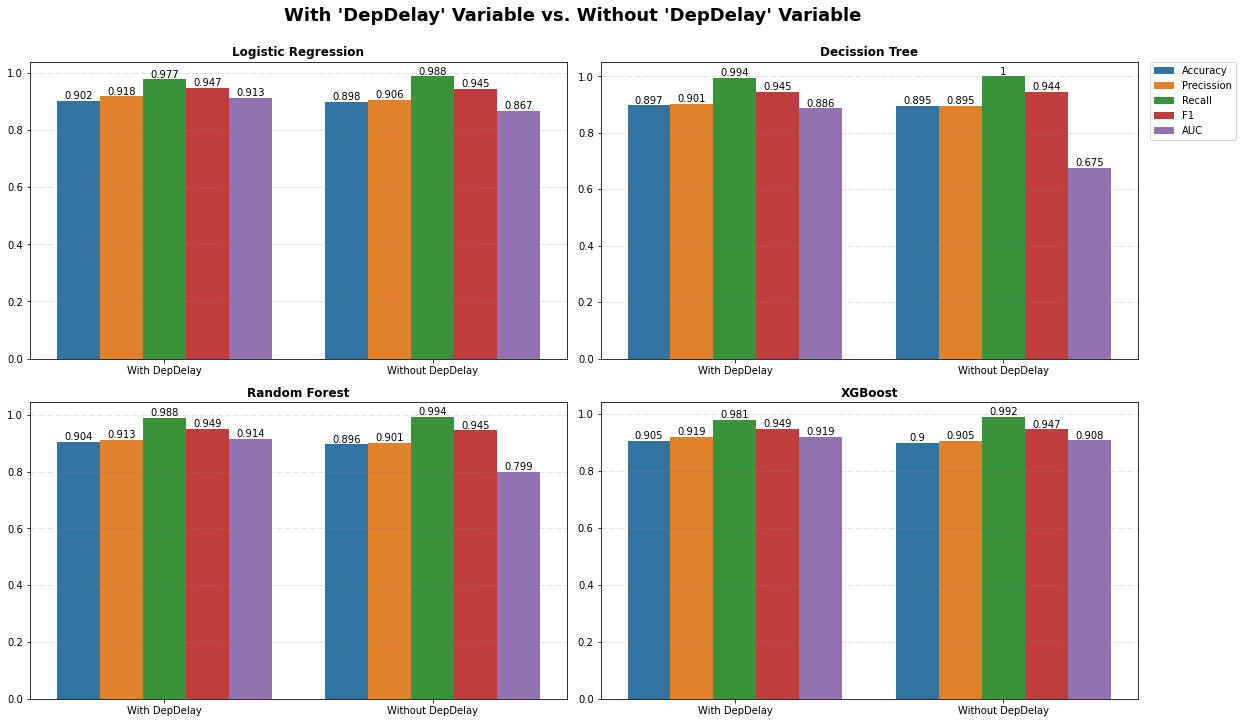

In [49]:
# Especifico la figura y los subplots:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# Creo las 4 gráficas, seleccionando registros del dataframe "melt_df":
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'LogisticReg_Eng' or Name == 'LogisticReg_Trunc'"), ax=ax1)
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'DecissionTree_Eng' or Name == 'DecissionTree_Trunc'"), ax=ax2)
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'RandomForest_Eng' or Name == 'RandomForest_Trunc'"), ax=ax3)
sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name == 'XGBoost_Eng' or Name == 'XGBoost_Trunc'"), ax=ax4)

# Muestro los valores de las métricas:
for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)
for container in ax3.containers:
    ax3.bar_label(container)
for container in ax4.containers:
    ax4.bar_label(container)

# Muestro los "grids":
ax1.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
ax2.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
ax3.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
ax4.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)

# Muestro una leyenda general, y oculto las leyendas de cada subplot
#   (en la primera línea hay que especificar un "ax", para que pille la leyenda):
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.08, 0.93))
ax1.get_legend().remove()
ax2.get_legend().remove()
ax3.get_legend().remove()
ax4.get_legend().remove()

# Especifico los títulos de cada subplot:
ax1.set_title('Logistic Regression', fontweight='bold')
ax2.set_title('Decission Tree', fontweight='bold')
ax3.set_title('Random Forest', fontweight='bold')
ax4.set_title('XGBoost', fontweight='bold')

# Oculto los labels de cada subplot:
ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')
ax3.set_xlabel('')
ax3.set_ylabel('')
ax4.set_xlabel('')
ax4.set_ylabel('')

# Especifico los xticklabels de cada subplot:
ax1.set_xticklabels(['With DepDelay', 'Without DepDelay'])
ax2.set_xticklabels(['With DepDelay', 'Without DepDelay'])
ax3.set_xticklabels(['With DepDelay', 'Without DepDelay'])
ax4.set_xticklabels(['With DepDelay', 'Without DepDelay'])

# Especifico el título general:
plt.suptitle("With 'DepDelay' Variable vs. Without 'DepDelay' Variable", fontsize=18, fontweight='bold', verticalalignment='baseline')

plt.tight_layout();

In [50]:
# Guardo el dataframe de resultados en un CSV, para poder recuperarlo posteriormente:
clasiff_metrics.to_csv('./output/clasiff_metrics.csv', index=False)

> La eliminación de la variable **DepDelay** no le afectó tanto a los modelos de Clasificación como a los modelos de Regresión (mucho menos, de hecho), y es natural, porque no es lo mismo predecir si habrá retraso o no que predecir el tiempo de retraso (para lo cual es vital la variable **DepDelay**).  
> El modelo **Logistic Regression** empeoró en todas las métricas, salvo en **Recall**, que mejoró, y lo mismo le pasó al modelo **Decission Tree**, que clavó la métrica **Recall** (quizá sospechosamente, dada la tendencia al **overfitting** que parece tener este modelo). Y es llamativo el acusado empeoramiento de la métrica **AUC** en este último modelo, por cierto.  
> Al modelo **Random Forest** le pasó algo similar, empeorando en todas las métricas (sobretodo en **AUC**), menos en **Recall**, que también mejoró.  
> **XGBoost** fue el modelo que pasó mejor la prueba, mejorando un poco en **Recall**, y empeorando en todas las demás (pero de forma menos acusada que en los demás modelos).

---
## Comparativa Final  
Para acabar quiero hacer un gráfico comparativo de los modelos, para intentar sacar en claro cual puede ser el mejor, basándome en los resultados del ejercicio 5, en el que utilicé la técnica **Train/Test Splits** e **ingeniería de variables**.

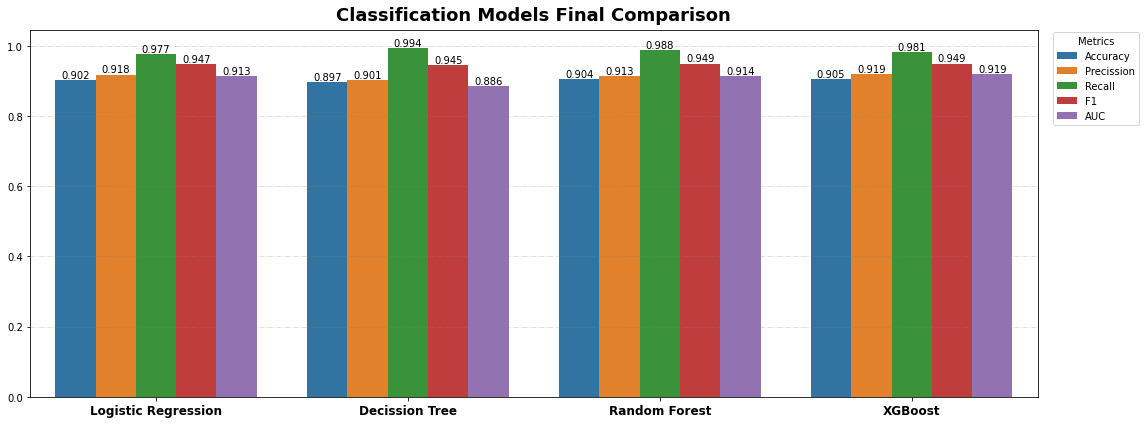

In [85]:
plt.figure(figsize=(16, 6))

ax = sbrn.barplot(x='Name', y='value', hue='Metric', data=melt_df.query("Name.str.contains('Eng')"))

for container in ax.containers:
    ax.bar_label(container)
    
plt.legend(title='Metrics', bbox_to_anchor=(1.01, 1.01))
plt.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.title("Classification Models Final Comparison", fontsize=18, fontweight='bold', verticalalignment='bottom')
ax.set_xticklabels(['Logistic Regression','Decission Tree','Random Forest','XGBoost'], fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout();

> Aunque el modelo **Decission Tree** es el que obtuvo el mejor valor en la métrica **Recall** (que para mí es la más importante en este ejercicio), considero que los modelos **Random Forest** y **XGBoost** lo compensan con las otras métricas (aparte de que ambos también obtuvieron muy buenos valores en la métrica **Recall**).  
> Yo en principio me decantaría por el modelo **XGBoost**, que tiene una enorme cantidad de parámetros con los que experimentar. Apuesto a que hay alguna combinación de parámetros con los que este modelo se pondría en cabeza en todas las métricas.  
> Por otra parte, es una lástima no haber podido probar los modelos **K-Nearest Neighbors** y **Support Vector Machines** (debido a su elevadísimo tiempo de ejecución). Dejo pendiente la tarea de probarlos con datasets más reducidos.

---